# **Naive Bayes Assignment**

# **Assignment 12**

# ***SalaryData Dataset(SalaryData.csv)***

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import keras
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# **Importing Dataset**

In [2]:
#importing salary_training dataset
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [3]:
#importing salary_testing dataset
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

# **Exploratory Data Analysis**

# **Checking for training data**

In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
train=salary_train.copy()

In [7]:
#checking missing values
(salary_train.isna().sum())/len(salary_train)*100

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [8]:
#checking duplicates
salary_train.duplicated().sum()

3258

In [9]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [10]:
#checking datatypes
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
#describe
salary_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [12]:
#checking info
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
#checking dependent feature

In [14]:
salary_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
salary_train['Salary'].nunique()

2

In [16]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

# **Checking for testing data**

In [17]:
salary_test.shape

(15060, 14)

In [18]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [19]:
test=salary_test.copy()

In [20]:
#checking the missing values
(salary_test.isna().sum())/len(salary_test)*100

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [21]:
#checking the duplicates
(salary_test.duplicated().sum())

930

In [22]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [23]:
#checking datatypes
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [24]:
#describe
salary_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [25]:
#info
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [26]:
#checking dependent feature class

In [27]:
salary_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [28]:
salary_test['Salary'].nunique()

2

In [29]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

**comparing the features**

In [30]:
pd.crosstab(salary_train['workclass'],salary_train['Salary'])

Salary              <=50K   >50K
workclass                       
 Federal-gov          578    365
 Local-gov           1458    609
 Private            17409   4876
 Self-emp-inc         474    600
 Self-emp-not-inc    1785    714
 State-gov            935    344
 Without-pay           14      0

In [31]:
pd.crosstab(salary_train['education'],salary_train['Salary'])

Salary          <=50K   >50K
education                   
 10th             761     59
 11th             989     59
 12th             348     29
 1st-4th          145      6
 5th-6th          276     12
 7th-8th          522     35
 9th              430     25
 Assoc-acdm       752    256
 Assoc-voc        963    344
 Bachelors       2918   2126
 Doctorate         95    280
 HS-grad         8223   1617
 Masters          709    918
 Preschool         45      0
 Prof-school      136    406
 Some-college    5341   1336

In [32]:
pd.crosstab(salary_train['occupation'],salary_train['Salary'])

Salary               <=50K   >50K
occupation                       
 Adm-clerical         3223    498
 Armed-Forces            8      1
 Craft-repair         3122    908
 Exec-managerial      2055   1937
 Farming-fishing       874    115
 Handlers-cleaners    1267     83
 Machine-op-inspct    1720    245
 Other-service        3080    132
 Priv-house-serv       142      1
 Prof-specialty       2227   1811
 Protective-serv       434    210
 Sales                2614    970
 Tech-support          634    278
 Transport-moving     1253    319

In [33]:
pd.crosstab(salary_train['occupation'],salary_train['workclass'])

workclass            Federal-gov   Local-gov   Private   Self-emp-inc  \
occupation                                                              
 Adm-clerical                316         281      2793             28   
 Armed-Forces                  9           0         0              0   
 Craft-repair                 63         143      3146             99   
 Exec-managerial             179         212      2647            385   
 Farming-fishing               8          29       450             51   
 Handlers-cleaners            22          46      1255              2   
 Machine-op-inspct            14          11      1881             10   
 Other-service                34         189      2665             27   
 Priv-house-serv               0           0       143              0   
 Prof-specialty              167         692      2254            157   
 Protective-serv              27         304       186              5   
 Sales                        14           7      2895            281   
 Tech-support                 66          38       723              3   
 Transport-moving             24         115      1247             26   

workclass            Self-emp-not-inc   State-gov   Without-pay  
occupation                                                       
 Adm-clerical                      49         251             3  
 Armed-Forces                       0           0             0  
 Craft-repair                     523          55             1  
 Exec-managerial                  383         186             0  
 Farming-fishing                  430          15             6  
 Handlers-cleaners                 15           9             1  
 Machine-op-inspct                 35          13             1  
 Other-service                    173         123             1  
 Priv-house-serv                    0           0             0  
 Prof-specialty                   365         403             0  
 Protective-serv                    6         116             0  
 Sales                            376          11             0  
 Tech-support                      26          56             0  
 Transport-moving                 118          41             1

In [34]:
pd.crosstab(salary_train['education'],salary_train['workclass'])

workclass       Federal-gov   Local-gov   Private   Self-emp-inc  \
education                                                          
 10th                     6          31       686             19   
 11th                     9          36       917             13   
 12th                     5          19       319              6   
 1st-4th                  0           4       133              1   
 5th-6th                  1           8       253              3   
 7th-8th                  2          27       414             10   
 9th                      3          23       380              9   
 Assoc-acdm              55          86       720             35   
 Assoc-voc               38          85       993             37   
 Bachelors              207         470      3455            259   
 Doctorate               15          26       172             33   
 HS-grad                260         498      7678            270   
 Masters                 65         336       863             77   
 Preschool                0           4        40              0   
 Prof-school             26          29       247             79   
 Some-college           251         385      5015            223   

workclass       Self-emp-not-inc   State-gov   Without-pay  
education                                                   
 10th                         65          13             0  
 11th                         59          14             0  
 12th                         18          10             0  
 1st-4th                      12           1             0  
 5th-6th                      19           4             0  
 7th-8th                      93          10             1  
 9th                          34           6             0  
 Assoc-acdm                   70          41             1  
 Assoc-voc                   108          46             0  
 Bachelors                   387         266             0  
 Doctorate                    46          83             0  
 HS-grad                     857         268             9  
 Masters                     120         166             0  
 Preschool                     0           1             0  
 Prof-school                 130          31             0  
 Some-college                481         319             3

In [35]:
#combining training and testing for visualization
df_com=train.append(test)
df_com

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [36]:
df_com_cat=df_com[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']]
df_com_num=df_com[['age','educationno','capitalgain','capitalloss','capitalloss']]

# **Correlation**

In [37]:
df_com.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.037623     0.079682     0.059426      0.101992
educationno   0.037623     1.000000     0.126907     0.081741      0.146206
capitalgain   0.079682     0.126907     1.000000    -0.032095      0.083880
capitalloss   0.059426     0.081741    -0.032095     1.000000      0.054220
hoursperweek  0.101992     0.146206     0.083880     0.054220      1.000000

# **Visualization**

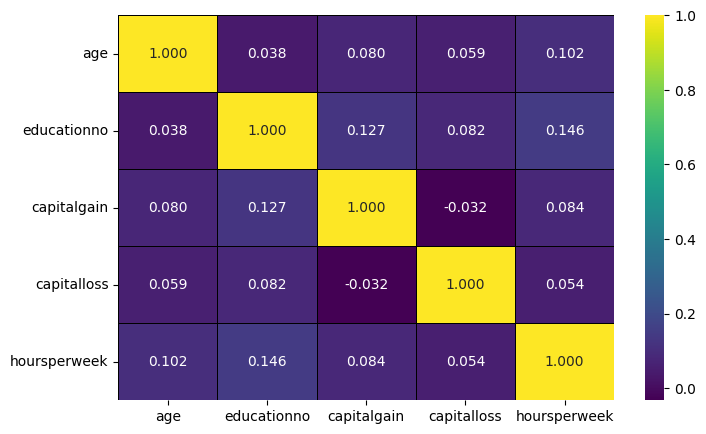

In [38]:
#heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_com.corr(),annot=True,cmap='viridis',fmt='.3f',linewidth=0.5,linecolor='black')
plt.show()

<Figure size 800x500 with 0 Axes>

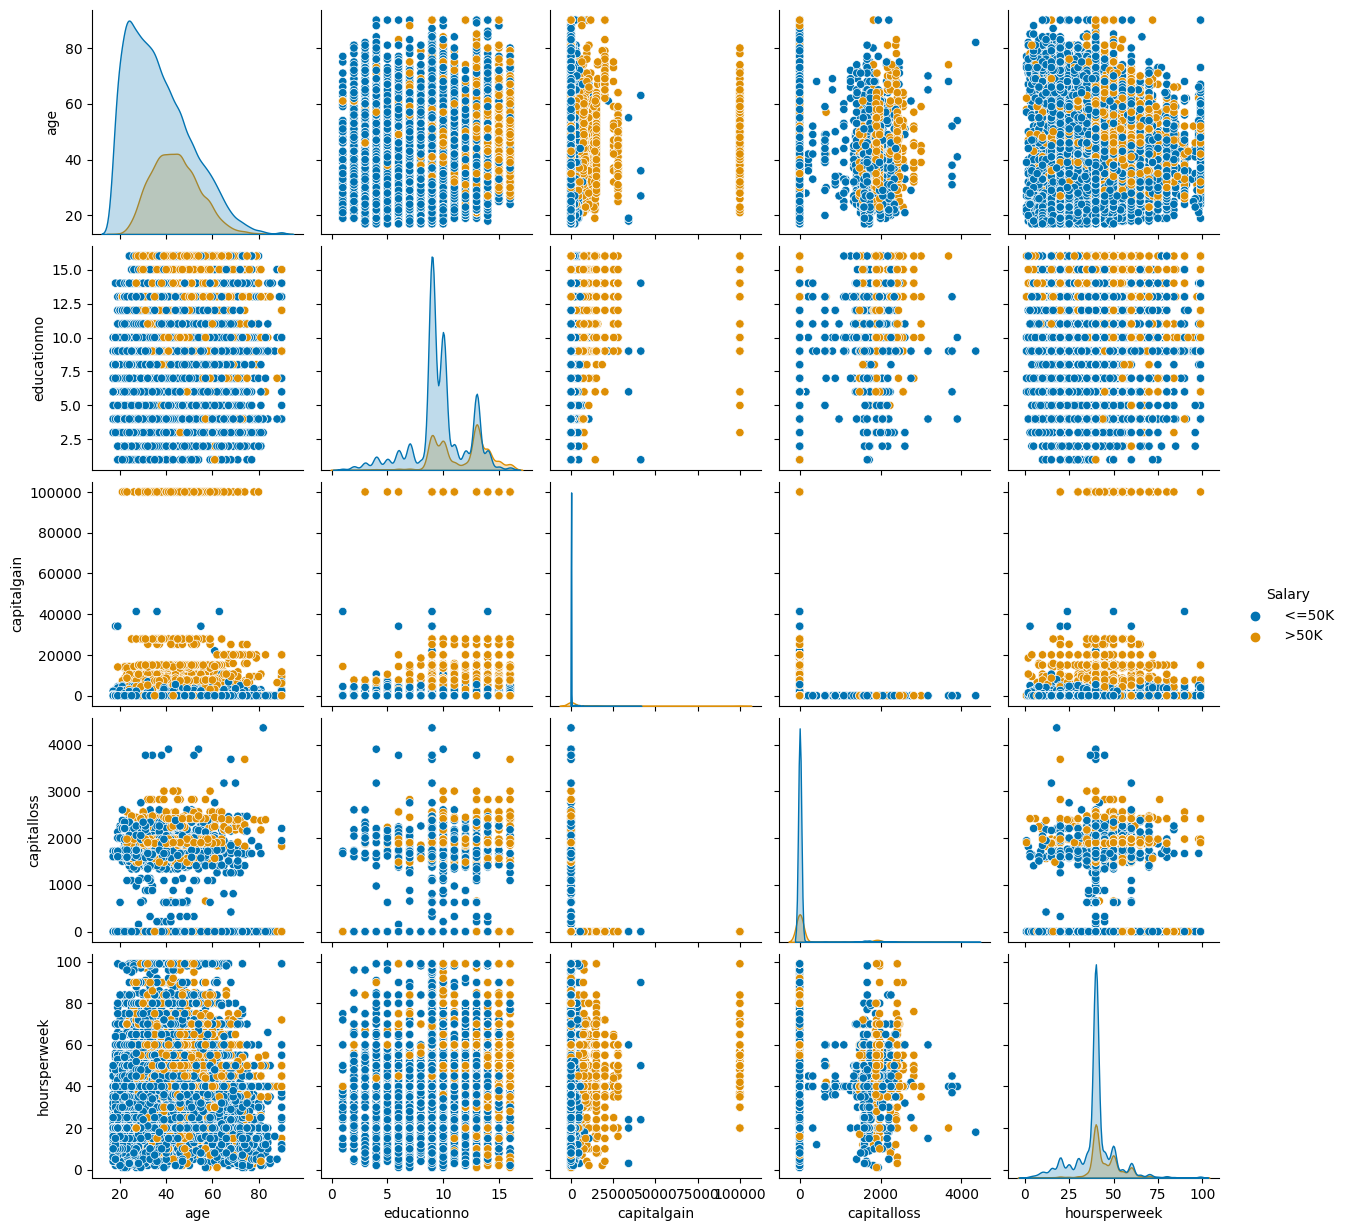

In [39]:
#pairwise plot
plt.figure(figsize=(8,5))
sns.pairplot(df_com,hue='Salary',palette='colorblind')
plt.show()

# **Histogram Plot**

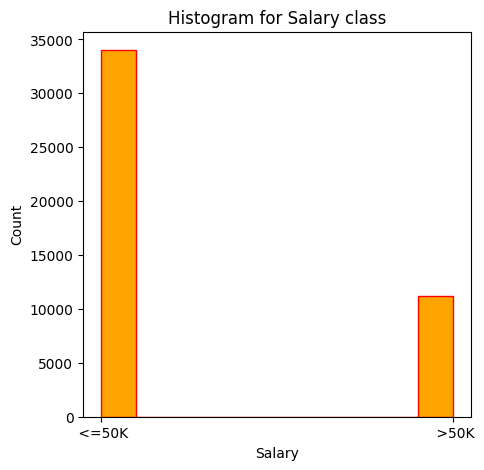

In [40]:
#Histogram plot for dependent feature
plt.figure(figsize=(5,5))
plt.hist(df_com['Salary'],color='orange',rwidth=1,edgecolor='red')
plt.title('Histogram for Salary class')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

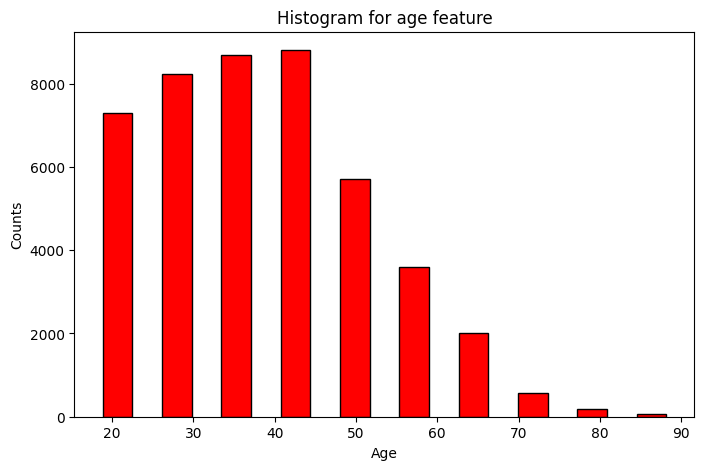

In [41]:
#histogram for age features
plt.figure(figsize=(8,5))
plt.hist(df_com['age'],color='red',rwidth=0.5,edgecolor='black')
plt.title('Histogram for age feature')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

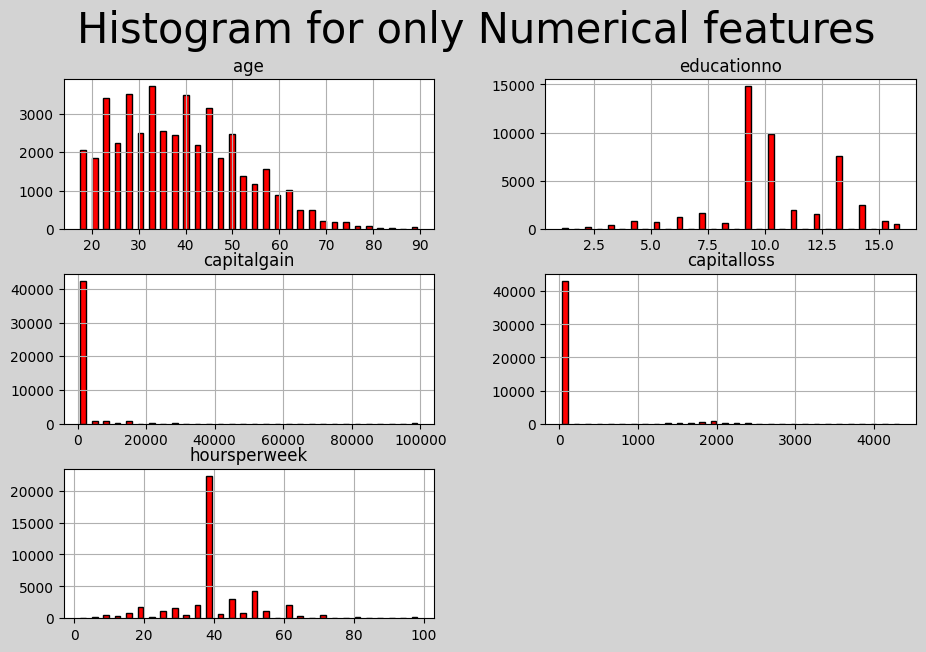

In [42]:
#histogram for only Numerical features
df_com.hist(bins=30,figsize=(11,7),rwidth=0.5,edgecolor='black',color='red')
plt.suptitle('Histogram for only Numerical features',ha='center',fontsize=30)
plt.gcf().set_facecolor('lightgray')
plt.show()

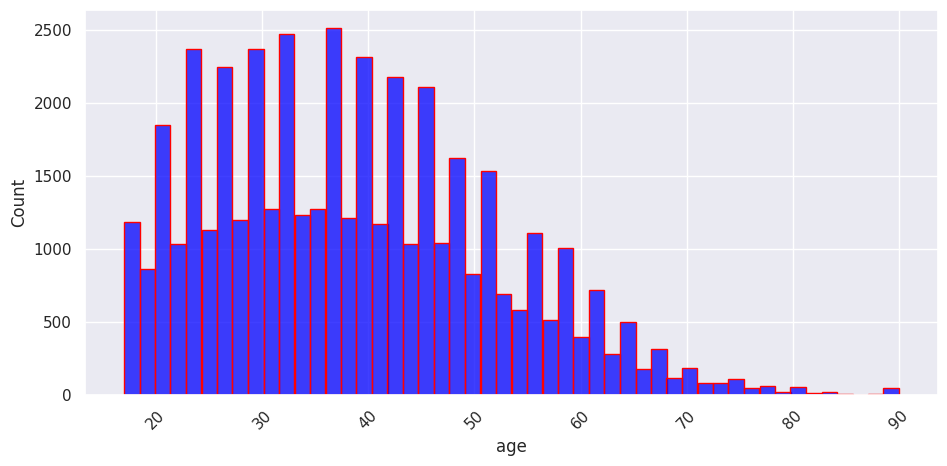

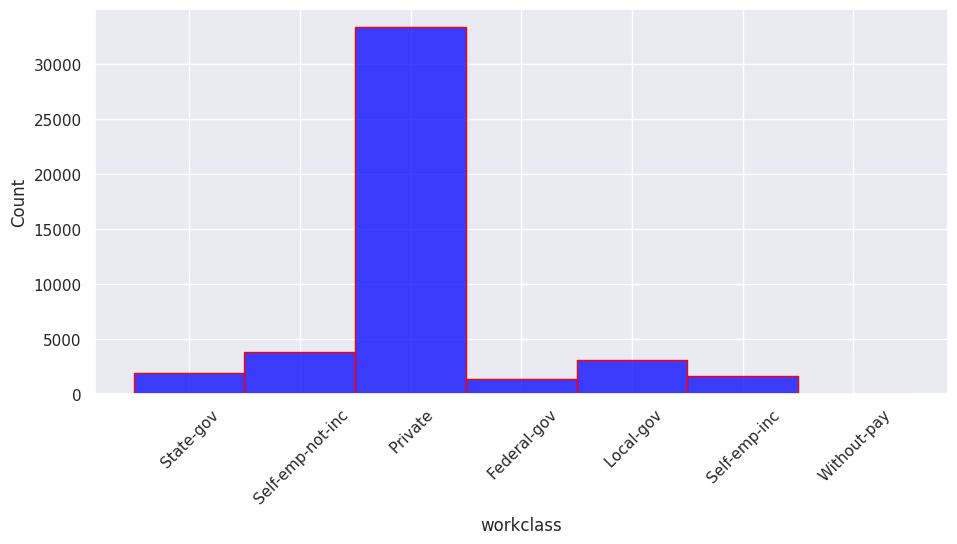

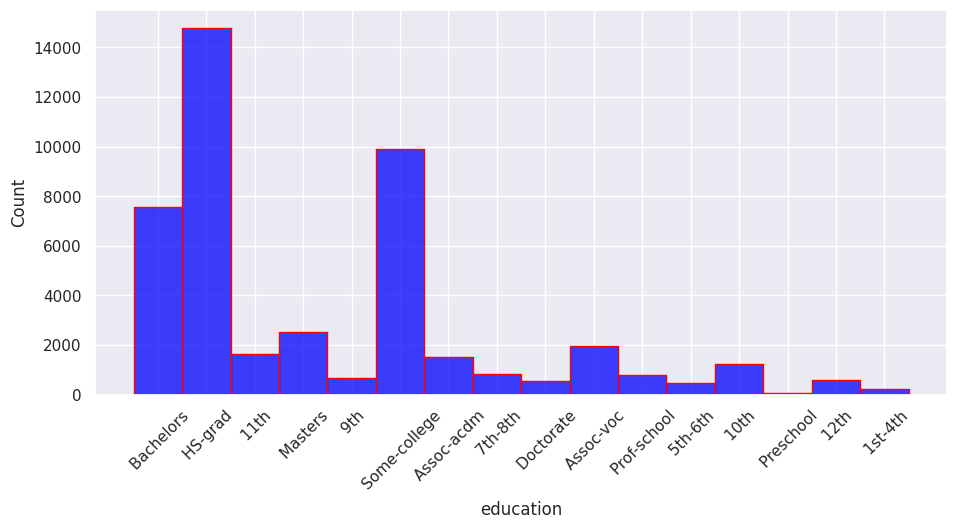

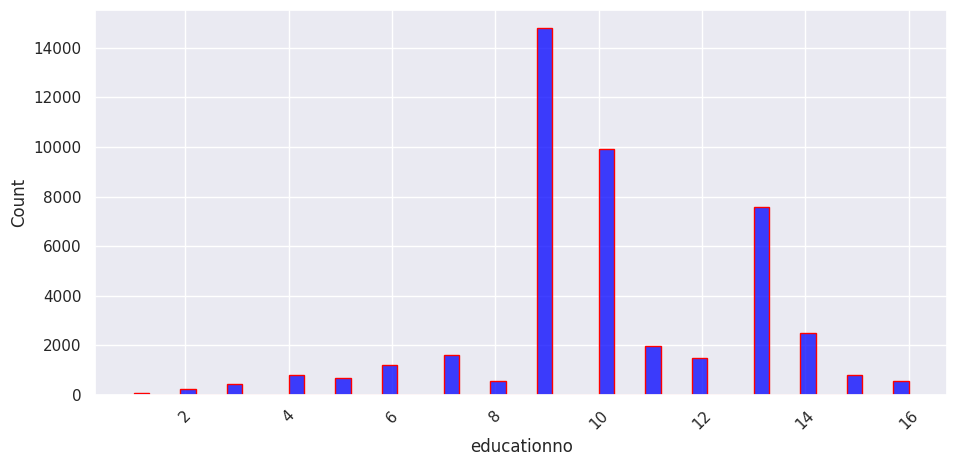

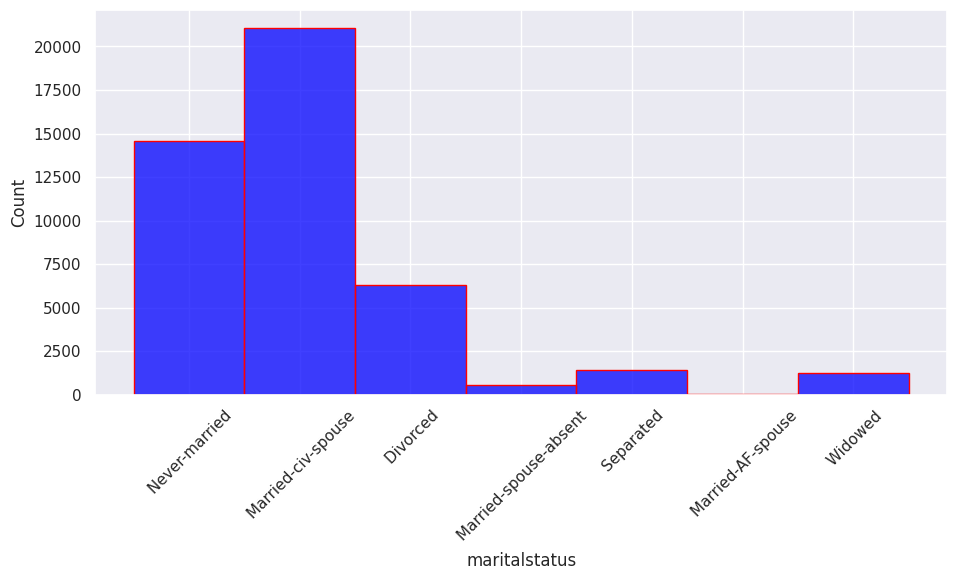

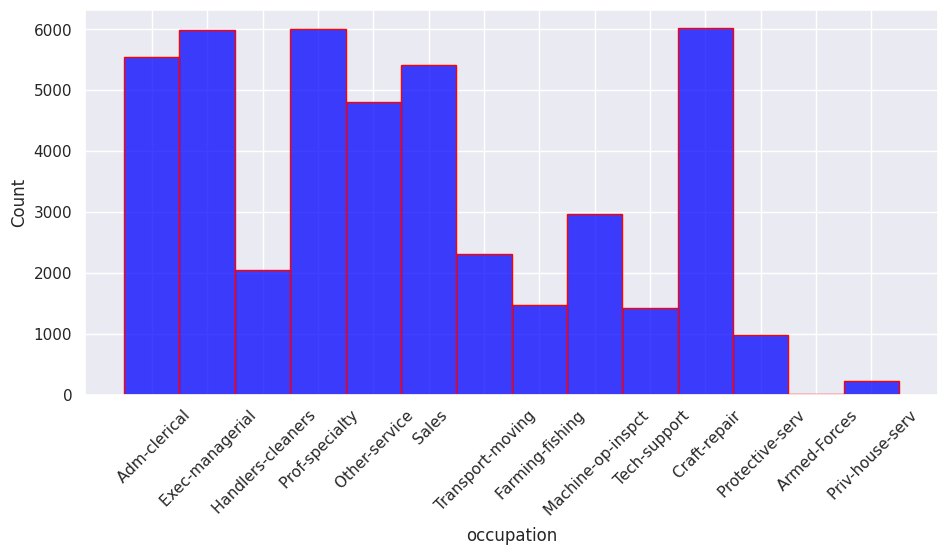

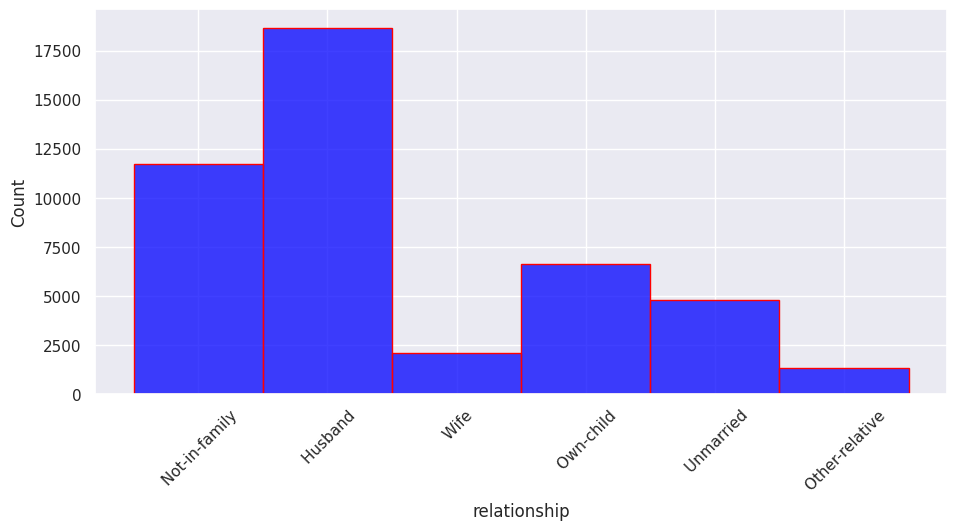

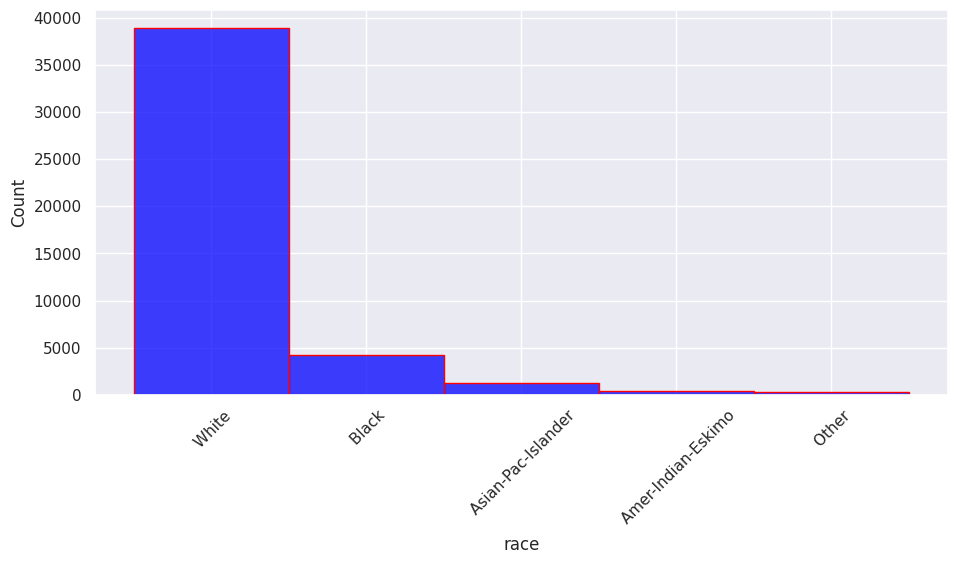

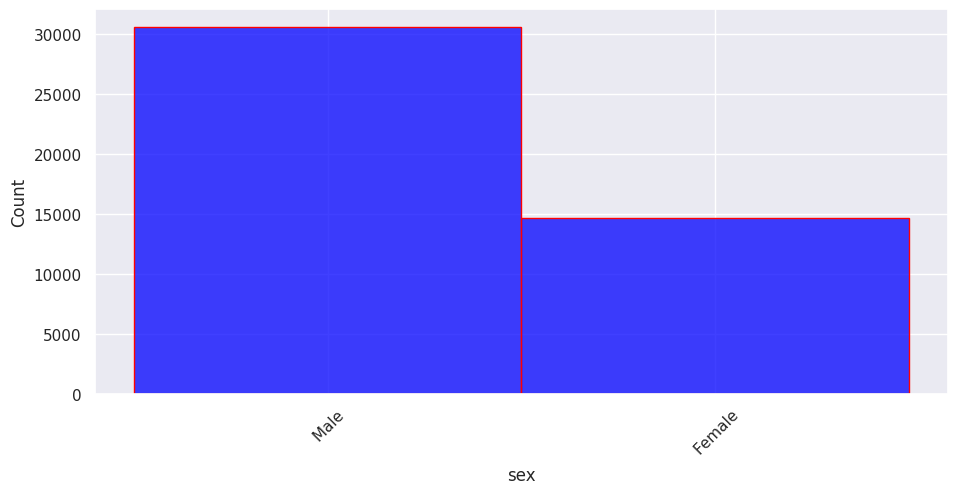

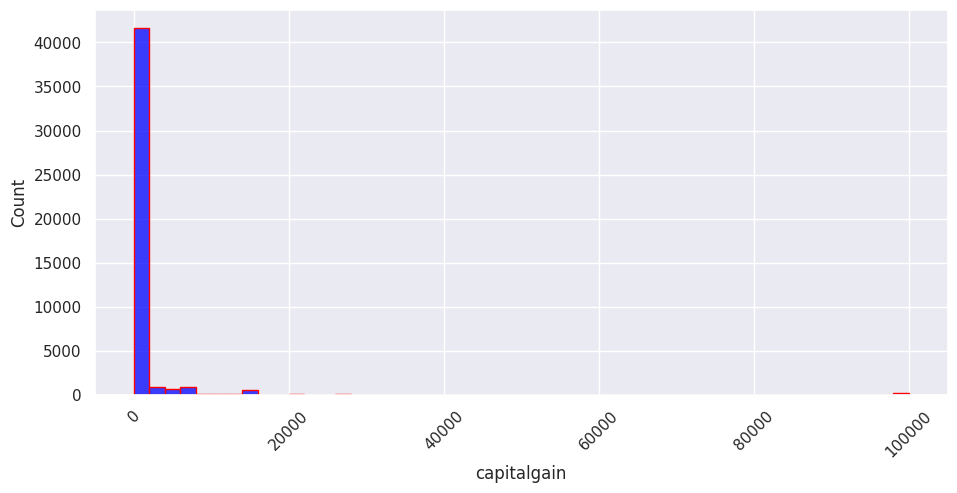

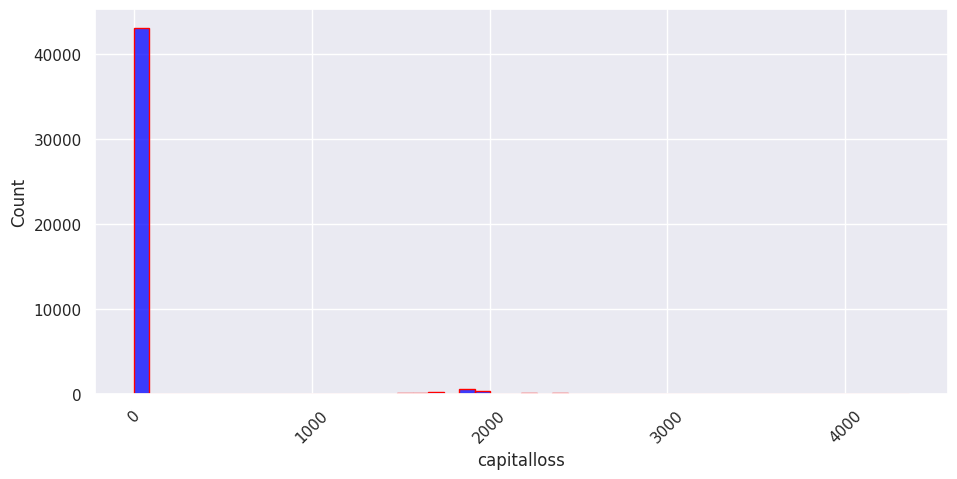

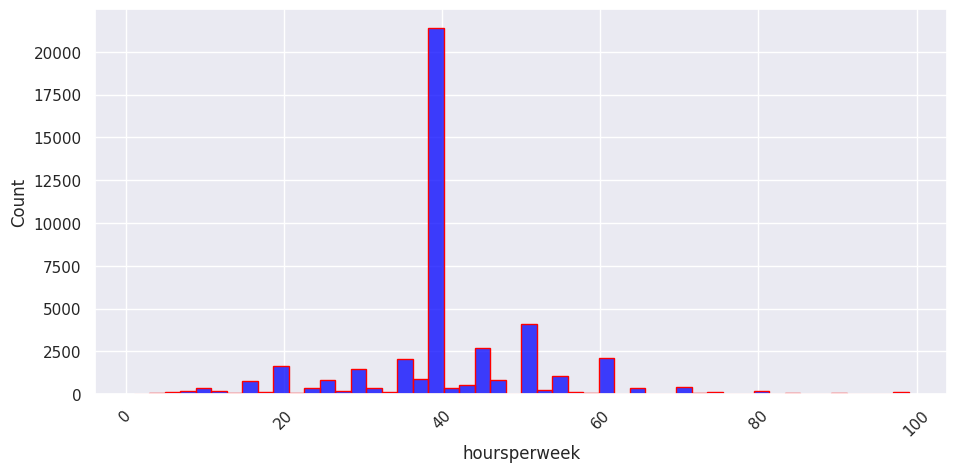

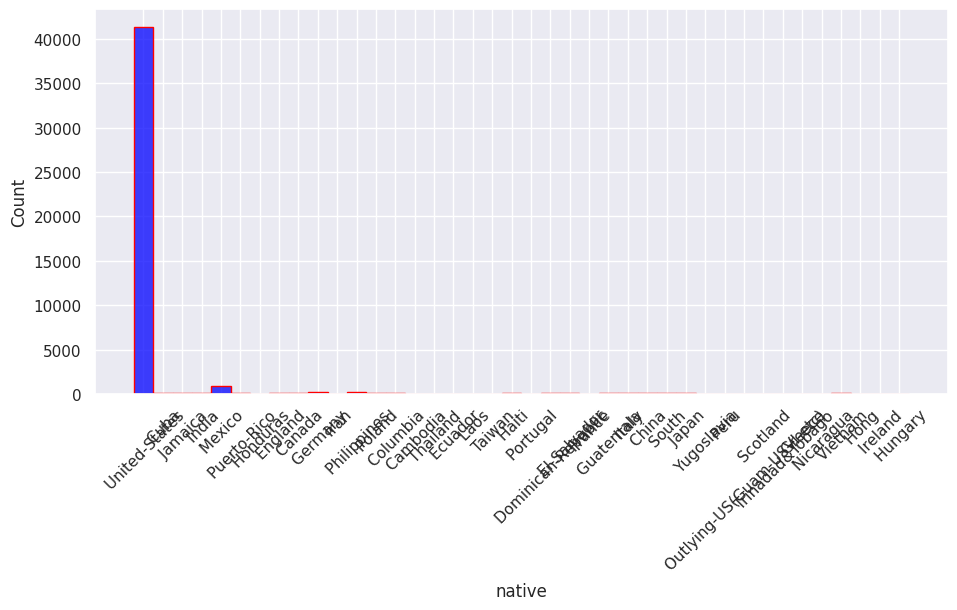

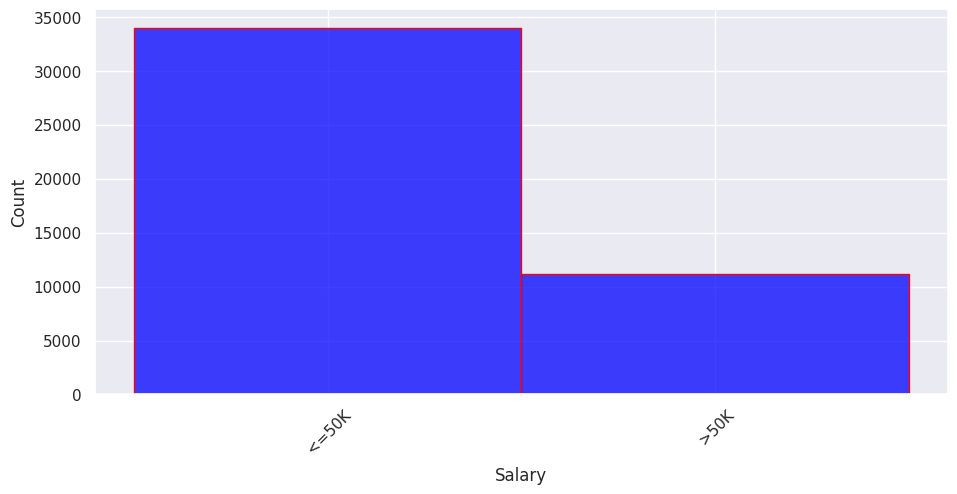

In [43]:
#histogram for all features
feat=df_com
sns.set(rc={'figure.figsize':(11,5)})
for f in feat:
  sns.histplot(df_com[f],bins=50,color='blue',edgecolor='red')
  plt.xticks(rotation=45)
  plt.show()

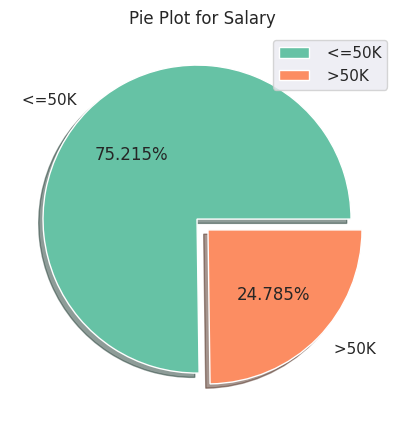

In [44]:
#Pie Plot for Salary feature
plt.figure(figsize=(9,5))
plt.pie(df_com['Salary'].value_counts(),labels=df_com['Salary'].unique(),autopct='%.3f%%',colors=sns.color_palette('Set2'),
        explode=[0.05,0.05],shadow=True)
plt.title('Pie Plot for Salary')
plt.legend()
plt.show()

<Axes: >

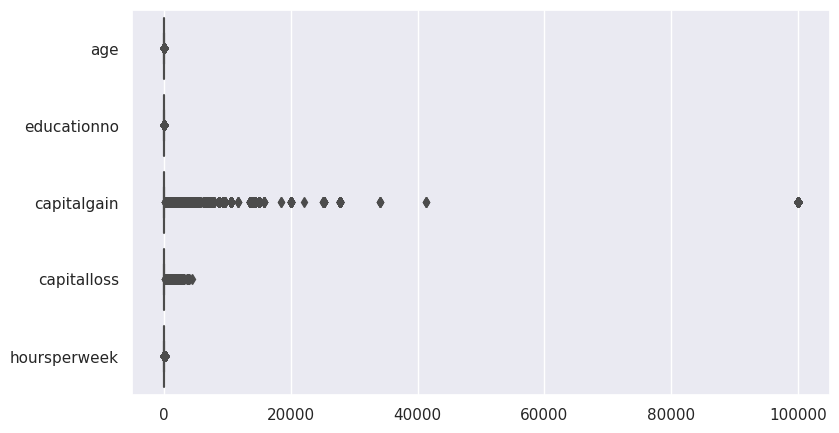

In [45]:
#boxplot
plt.figure(figsize=(9,5))
sns.boxplot(df_com,orient='h')

# **BiVariate Plots Analysis**

In [46]:
df_com.head(3)

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   

           occupation    relationship    race    sex  capitalgain  \
0        Adm-clerical   Not-in-family   White   Male         2174   
1     Exec-managerial         Husband   White   Male            0   
2   Handlers-cleaners   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K

Text(0, 0.5, 'Salary')

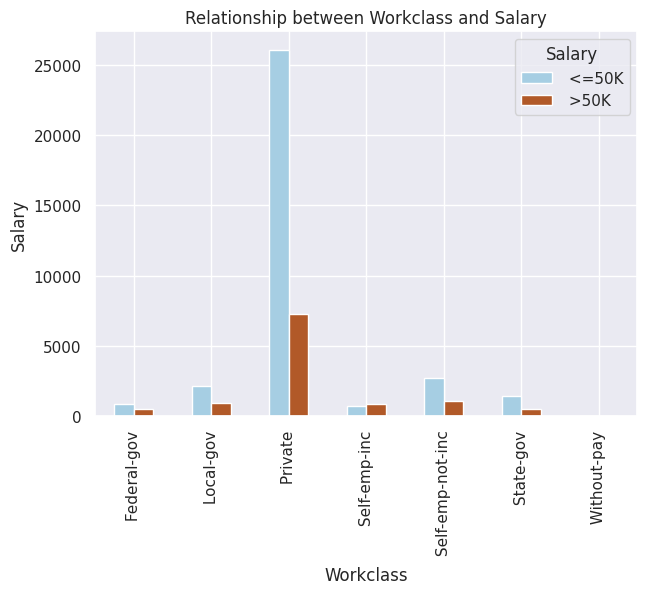

In [47]:
#relationship between workclass and salary
pd.crosstab(df_com['workclass'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='Paired')
plt.title('Relationship between Workclass and Salary')
plt.xlabel('Workclass')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

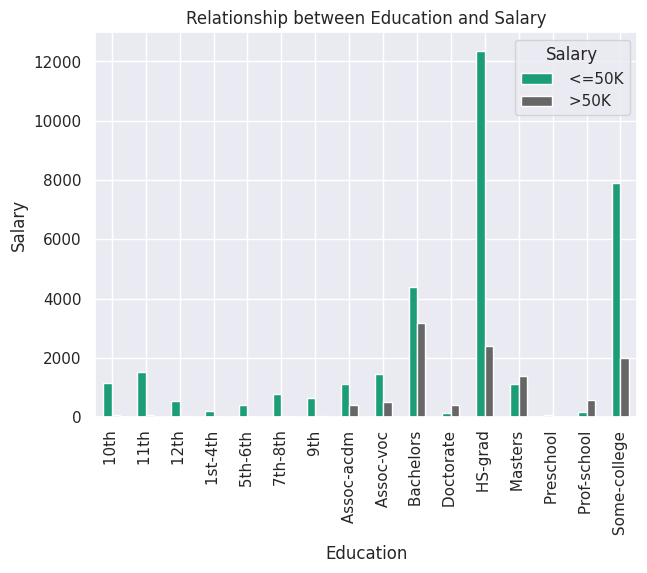

In [48]:
#relation between education and salary
pd.crosstab(df_com['education'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='Dark2')
plt.title('Relationship between Education and Salary')
plt.xlabel('Education')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

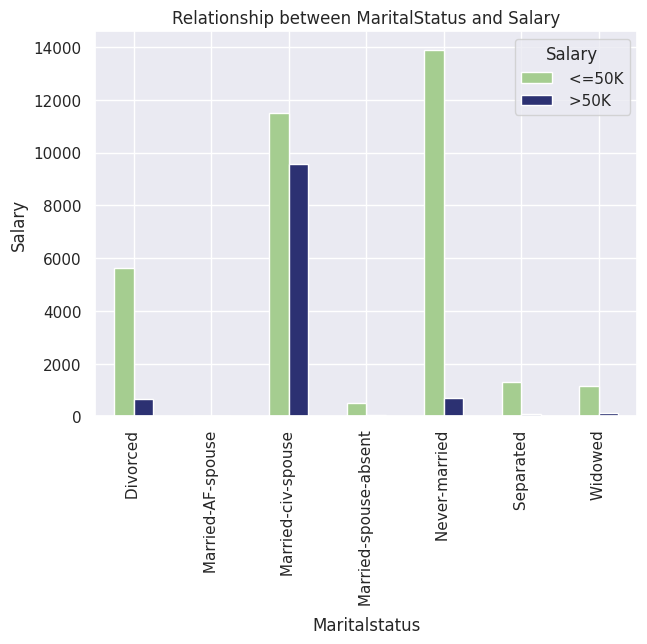

In [49]:
#relationship between maritalstatus and salary
pd.crosstab(df_com['maritalstatus'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='crest')
plt.title('Relationship between MaritalStatus and Salary')
plt.xlabel('Maritalstatus')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

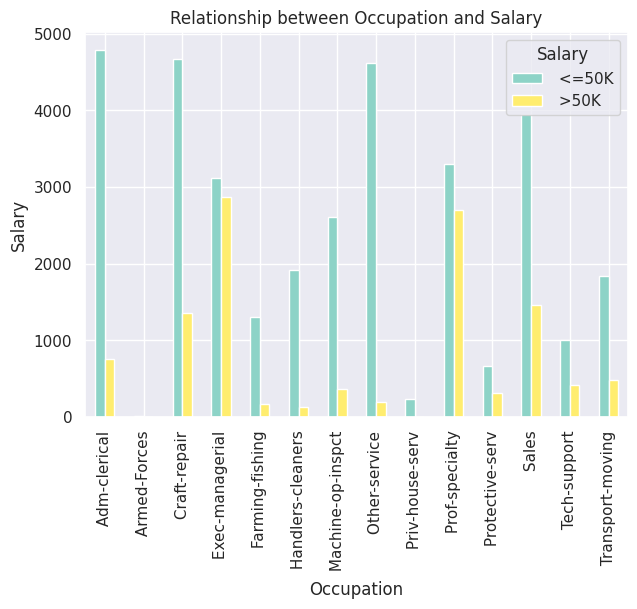

In [50]:
#relationship between occupation and salary
pd.crosstab(df_com['occupation'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='Set3')
plt.title('Relationship between Occupation and Salary')
plt.xlabel('Occupation')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

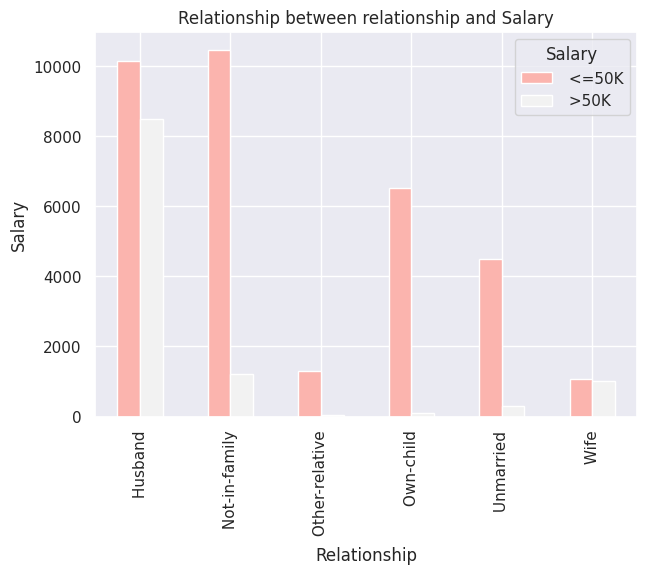

In [51]:
#relationship between relationship and salary
pd.crosstab(df_com['relationship'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='Pastel1')
plt.title('Relationship between relationship and Salary')
plt.xlabel('Relationship')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

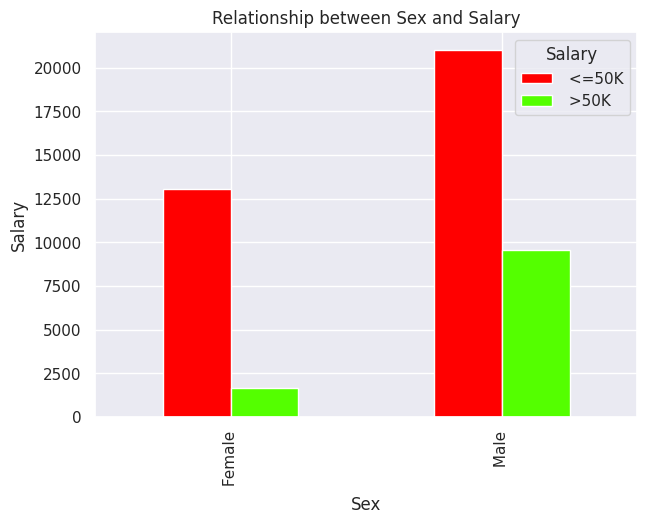

In [52]:
#relationship between sex and salary
pd.crosstab(df_com['sex'],df_com['Salary']).plot(kind='bar',figsize=(7,5),colormap='prism')
plt.title('Relationship between Sex and Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')

# **For Univariate Plots Analysis**

# **Bar Plots**

Text(0, 0.5, 'Salary')

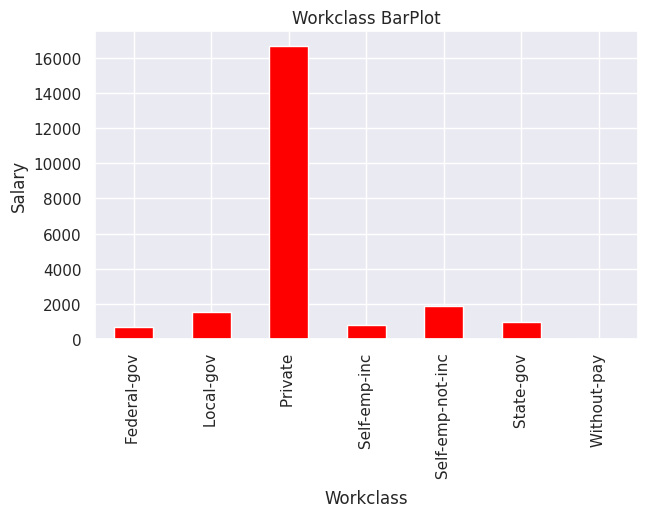

In [53]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['workclass']).mean().plot(kind='bar',figsize=(7,4),color='red')
plt.title('Workclass BarPlot')
plt.xlabel('Workclass')
plt.ylabel('Salary')

Text(0, 0.5, 'salary')

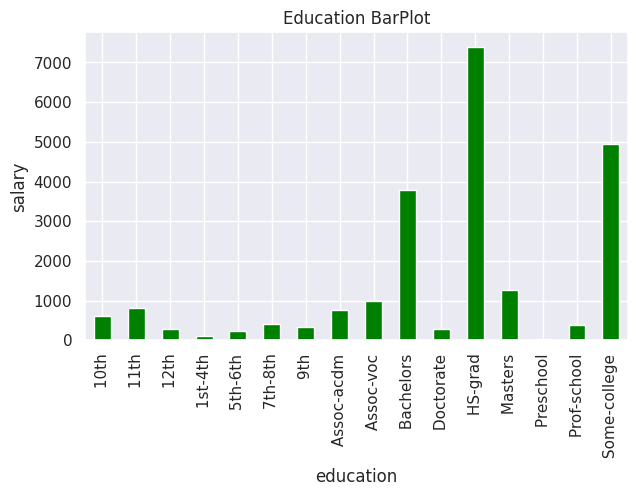

In [54]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['education']).mean().plot(kind='bar',figsize=(7,4),color='green')
plt.title('Education BarPlot')
plt.xlabel('education')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

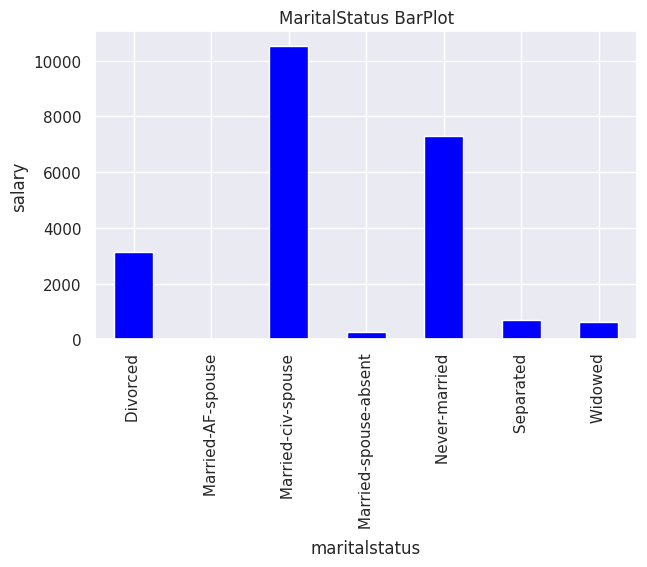

In [55]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['maritalstatus']).mean().plot(kind='bar',figsize=(7,4),color='blue')
plt.title('MaritalStatus BarPlot')
plt.xlabel('maritalstatus')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

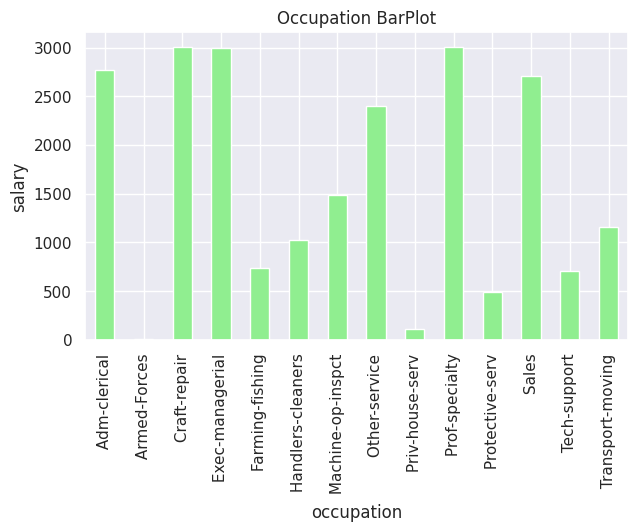

In [56]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['occupation']).mean().plot(kind='bar',figsize=(7,4),color='lightgreen')
plt.title('Occupation BarPlot')
plt.xlabel('occupation')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

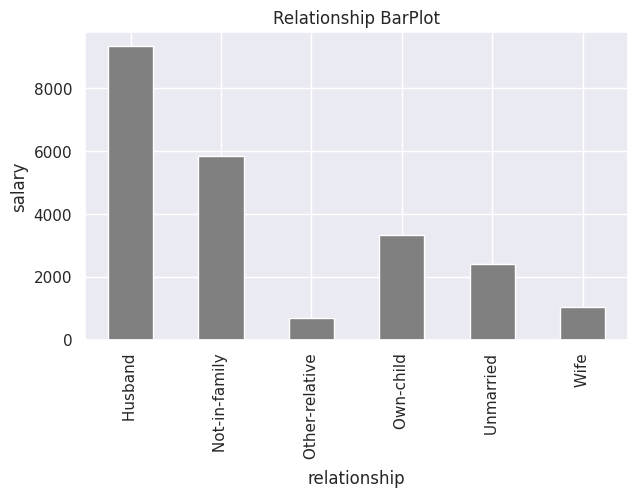

In [57]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['relationship']).mean().plot(kind='bar',figsize=(7,4),color='gray')
plt.title('Relationship BarPlot')
plt.xlabel('relationship')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

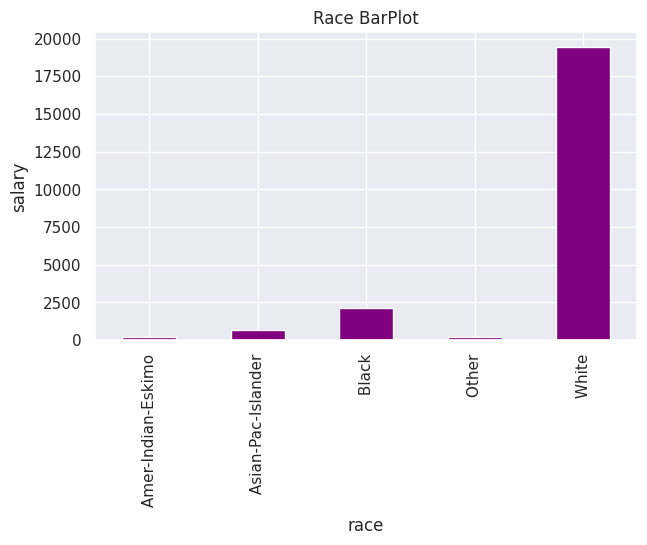

In [58]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['race']).mean().plot(kind='bar',figsize=(7,4),color='purple')
plt.title('Race BarPlot')
plt.xlabel('race')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

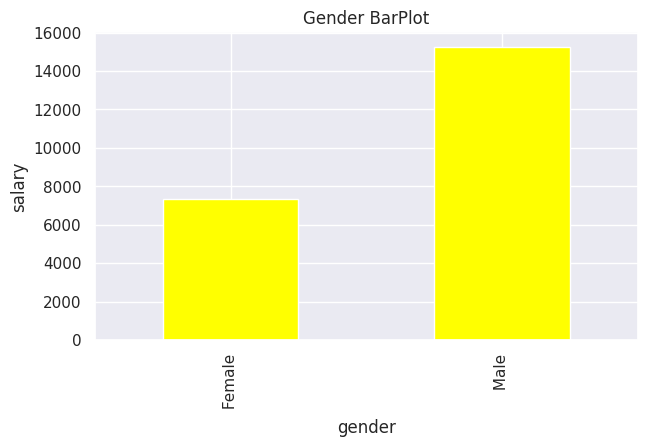

In [59]:
#BarPlot
pd.crosstab(df_com['Salary'],df_com['sex']).mean().plot(kind='bar',figsize=(7,4),color='yellow')
plt.title('Gender BarPlot')
plt.xlabel('gender')
plt.ylabel('salary')

# **Count Plots**

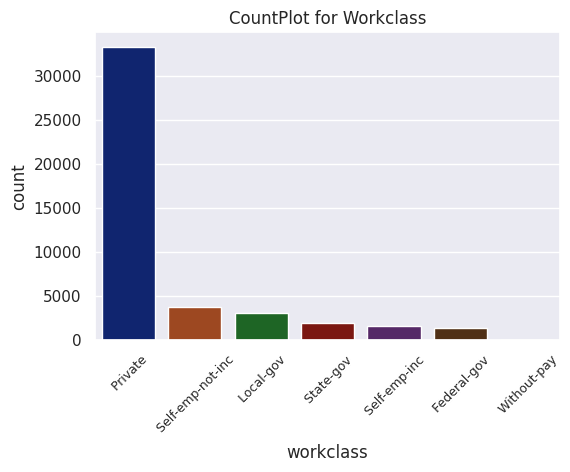

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='workclass',data=df_com,palette='dark',order=df_com['workclass'].value_counts().index)
plt.xticks(rotation=45,fontsize=9)
plt.title('CountPlot for Workclass')
plt.show()

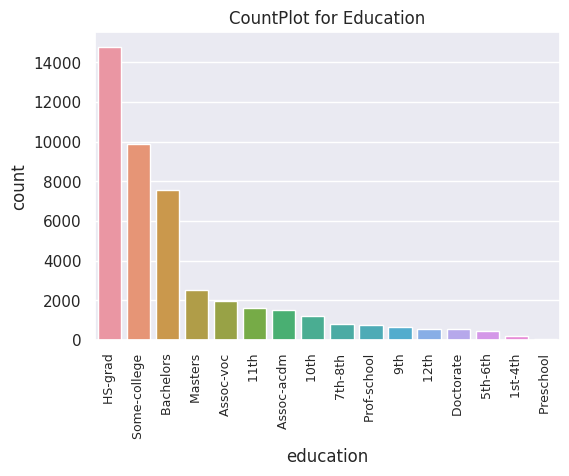

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='education',data=df_com,order=df_com['education'].value_counts().index)
plt.xticks(rotation=90,fontsize=9)
plt.title('CountPlot for Education')
plt.show()

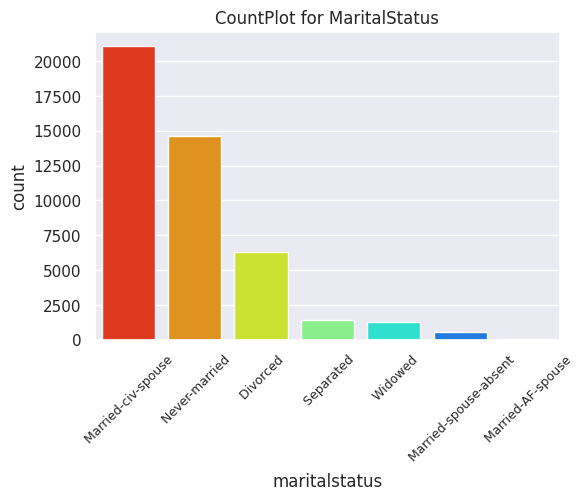

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x='maritalstatus',palette='jet_r',data=df_com,order=df_com['maritalstatus'].value_counts().index)
plt.xticks(rotation=45,fontsize=9)
plt.title('CountPlot for MaritalStatus')
plt.show()

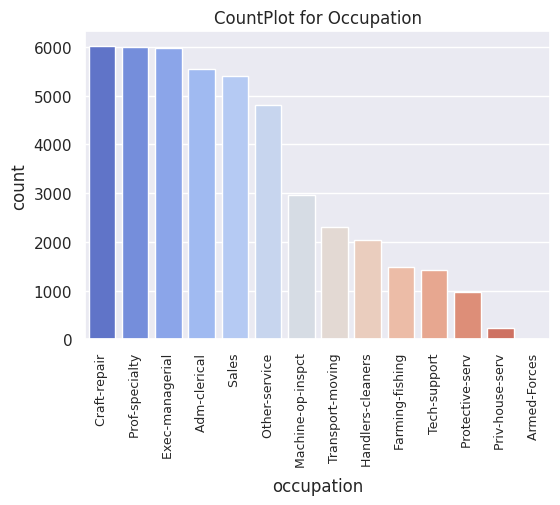

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x='occupation',data=df_com,palette='coolwarm',order=df_com['occupation'].value_counts().index)
plt.xticks(rotation=90,fontsize=9)
plt.title('CountPlot for Occupation')
plt.show()

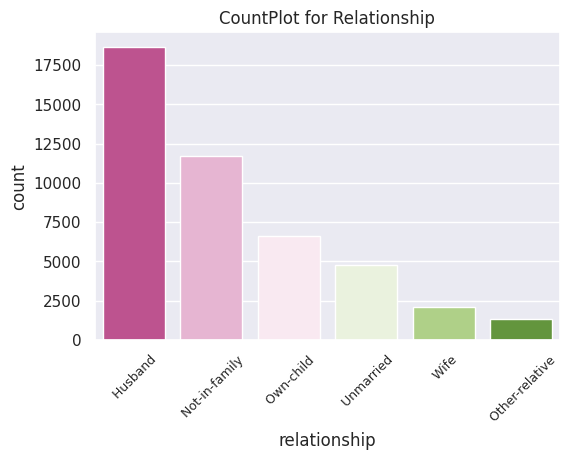

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='relationship',data=df_com,palette='PiYG',order=df_com['relationship'].value_counts().index)
plt.xticks(rotation=45,fontsize=9)
plt.title('CountPlot for Relationship')
plt.show()

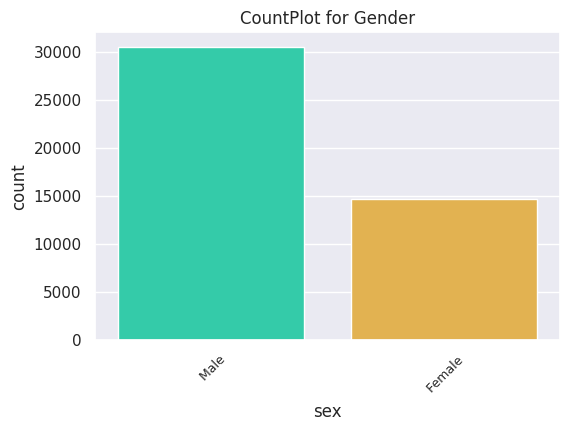

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex',data=df_com,palette='turbo',order=df_com['sex'].value_counts().index)
plt.xticks(rotation=45,fontsize=9)
plt.title('CountPlot for Gender')
plt.show()

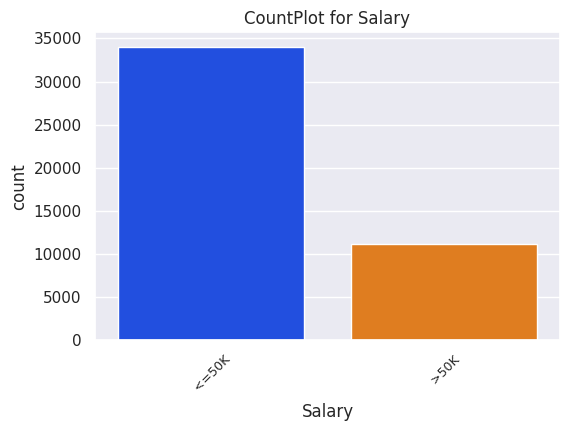

In [66]:
#countplot for dependent feature i.e Salary
plt.figure(figsize=(6,4))
sns.countplot(x='Salary',data=df_com,palette='bright',order=df_com['Salary'].value_counts().index)
plt.xticks(rotation=45,fontsize=9)
plt.title('CountPlot for Salary')
plt.show()

In [67]:
#from matplotlib import colormaps
#list(colormaps)
#by using above code we can get to know different colormaps and palette present in matplotlib and seaborn

# **Label Encoding**

In [68]:
#so to convert str in obj we have to perform label encoding

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
string=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [71]:
for i in string:
  salary_train[i]=le.fit_transform(salary_train[i])
  salary_test[i]=le.fit_transform(salary_test[i])

In [72]:
#now perform encoding on dependent feature y i.e "Salary"

In [73]:
salary_train['Salary']=le.fit_transform(salary_train['Salary'])
salary_test['Salary']=le.fit_transform(salary_test['Salary'])

In [74]:
salary_train

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [75]:
salary_test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [76]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int64
 2   education      30161 non-null  int64
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int64
 5   occupation     30161 non-null  int64
 6   relationship   30161 non-null  int64
 7   race           30161 non-null  int64
 8   sex            30161 non-null  int64
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int64
 13  Salary         30161 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [77]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int64
 2   education      15060 non-null  int64
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int64
 5   occupation     15060 non-null  int64
 6   relationship   15060 non-null  int64
 7   race           15060 non-null  int64
 8   sex            15060 non-null  int64
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int64
 13  Salary         15060 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [78]:
#now label encoding is done

In [79]:
#our features have different scalers
#So we have to perform Feature Scaling

# **Feature Scaling**

In [80]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [81]:
salary_train.iloc[:,:-1]=ms.fit_transform(salary_train.iloc[:,:-1])
salary_test.iloc[:,:-1]=ms.fit_transform(salary_test.iloc[:,:-1])

In [82]:
salary_train.head(5)

age  workclass  education  educationno  maritalstatus  occupation  \
0  0.301370   0.833333   0.600000     0.800000       0.666667    0.000000   
1  0.452055   0.666667   0.600000     0.800000       0.333333    0.230769   
2  0.287671   0.333333   0.733333     0.533333       0.000000    0.384615   
3  0.493151   0.333333   0.066667     0.400000       0.333333    0.384615   
4  0.150685   0.333333   0.600000     0.800000       0.333333    0.692308   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek    native  \
0           0.2   1.0  1.0      0.02174          0.0      0.397959  0.948718   
1           0.0   1.0  1.0      0.00000          0.0      0.122449  0.948718   
2           0.2   1.0  1.0      0.00000          0.0      0.397959  0.948718   
3           0.0   0.5  1.0      0.00000          0.0      0.397959  0.948718   
4           1.0   0.5  0.0      0.00000          0.0      0.397959  0.102564   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [83]:
salary_test.head(5)

age  workclass  education  educationno  maritalstatus  occupation  \
0  0.109589   0.333333   0.066667     0.400000       0.666667    0.461538   
1  0.287671   0.333333   0.733333     0.533333       0.333333    0.307692   
2  0.150685   0.166667   0.466667     0.733333       0.333333    0.769231   
3  0.369863   0.333333   1.000000     0.600000       0.333333    0.461538   
4  0.232877   0.333333   0.000000     0.333333       0.666667    0.538462   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek    native  \
0           0.6   0.5  1.0     0.000000          0.0      0.397959  0.948718   
1           0.0   1.0  1.0     0.000000          0.0      0.500000  0.948718   
2           0.0   1.0  1.0     0.000000          0.0      0.397959  0.948718   
3           0.0   0.5  1.0     0.076881          0.0      0.397959  0.948718   
4           0.2   1.0  1.0     0.000000          0.0      0.295918  0.948718   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [84]:
#correlation
salary_train.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.080537  -0.001091     0.043525      -0.276363   
workclass      0.080537   1.000000   0.017864     0.037833      -0.034235   
education     -0.001091   0.017864   1.000000     0.345420      -0.040704   
educationno    0.043525   0.037833   0.345420     1.000000      -0.063419   
maritalstatus -0.276363  -0.034235  -0.040704    -0.063419       1.000000   
occupation    -0.005682   0.015572  -0.038213     0.087717       0.022655   
relationship  -0.246452  -0.067414  -0.012732    -0.091935       0.177955   
race           0.023380   0.044734   0.011139     0.032805      -0.068641   
sex            0.081972   0.074966  -0.027831     0.006155      -0.119774   
capitalgain    0.080152   0.035349   0.030582     0.124416      -0.042414   
capitalloss    0.060278   0.007244   0.014822     0.079691      -0.035385   
hoursperweek   0.101598   0.050723   0.059892     0.152522      -0.189004   
native        -0.001548   0.007598   0.079715     0.092625      -0.026057   
Salary         0.241991   0.018040   0.079013     0.335287      -0.193504   

               occupation  relationship      race       sex  capitalgain  \
age             -0.005682     -0.246452  0.023380  0.081972     0.080152   
workclass        0.015572     -0.067414  0.044734  0.074966     0.035349   
education       -0.038213     -0.012732  0.011139 -0.027831     0.030582   
educationno      0.087717     -0.091935  0.032805  0.006155     0.124416   
maritalstatus    0.022655      0.177955 -0.068641 -0.119774    -0.042414   
occupation       1.000000     -0.053727  0.000717  0.062316     0.022162   
relationship    -0.053727      1.000000 -0.117148 -0.584881    -0.058257   
race             0.000717     -0.117148  1.000000  0.089207     0.014355   
sex              0.062316     -0.584881  0.089207  1.000000     0.048809   
capitalgain      0.022162     -0.058257  0.014355  0.048809     1.000000   
capitalloss      0.014612     -0.063659  0.023461  0.047285    -0.032218   
hoursperweek     0.018365     -0.257850  0.048533  0.231272     0.080431   
native          -0.003298     -0.010661  0.126507  0.000063     0.008513   
Salary           0.051577     -0.250998  0.071666  0.216680     0.221195   

               capitalloss  hoursperweek    native    Salary  
age               0.060278      0.101598 -0.001548  0.241991  
workclass         0.007244      0.050723  0.007598  0.018040  
education         0.014822      0.059892  0.079715  0.079013  
educationno       0.079691      0.152522  0.092625  0.335287  
maritalstatus    -0.035385     -0.189004 -0.026057 -0.193504  
occupation        0.014612      0.018365 -0.003298  0.051577  
relationship     -0.063659     -0.257850 -0.010661 -0.250998  
race              0.023461      0.048533  0.126507  0.071666  
sex               0.047285      0.231272  0.000063  0.216680  
capitalgain      -0.032218      0.080431  0.008513  0.221195  
capitalloss       1.000000      0.052454  0.010193  0.150222  
hoursperweek      0.052454      1.000000  0.008429  0.229480  
native            0.010193      0.008429  1.000000  0.023515  
Salary            0.150222      0.229480  0.023515  1.000000

<Axes: >

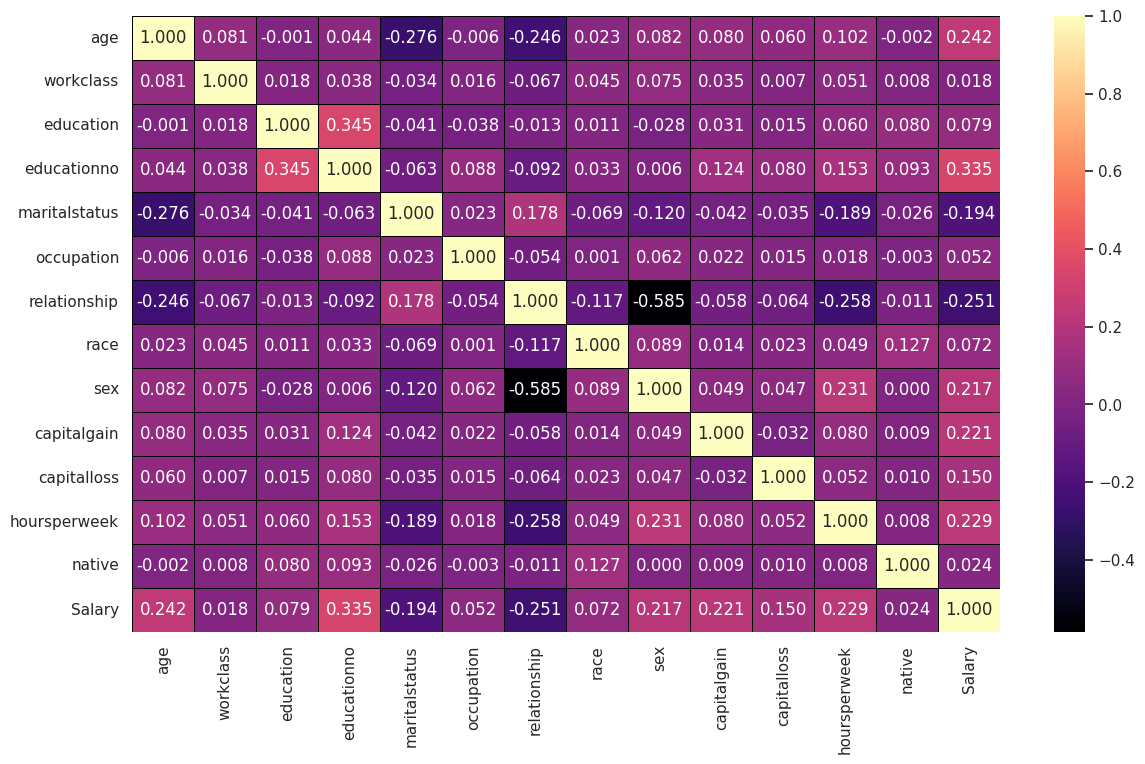

In [85]:
#heatmap
plt.figure(figsize=(14,8))
sns.heatmap(salary_train.corr(),annot=True,cmap='magma',fmt='.3f',linewidth=0.5,linecolor='black')

<Figure size 1000x800 with 0 Axes>

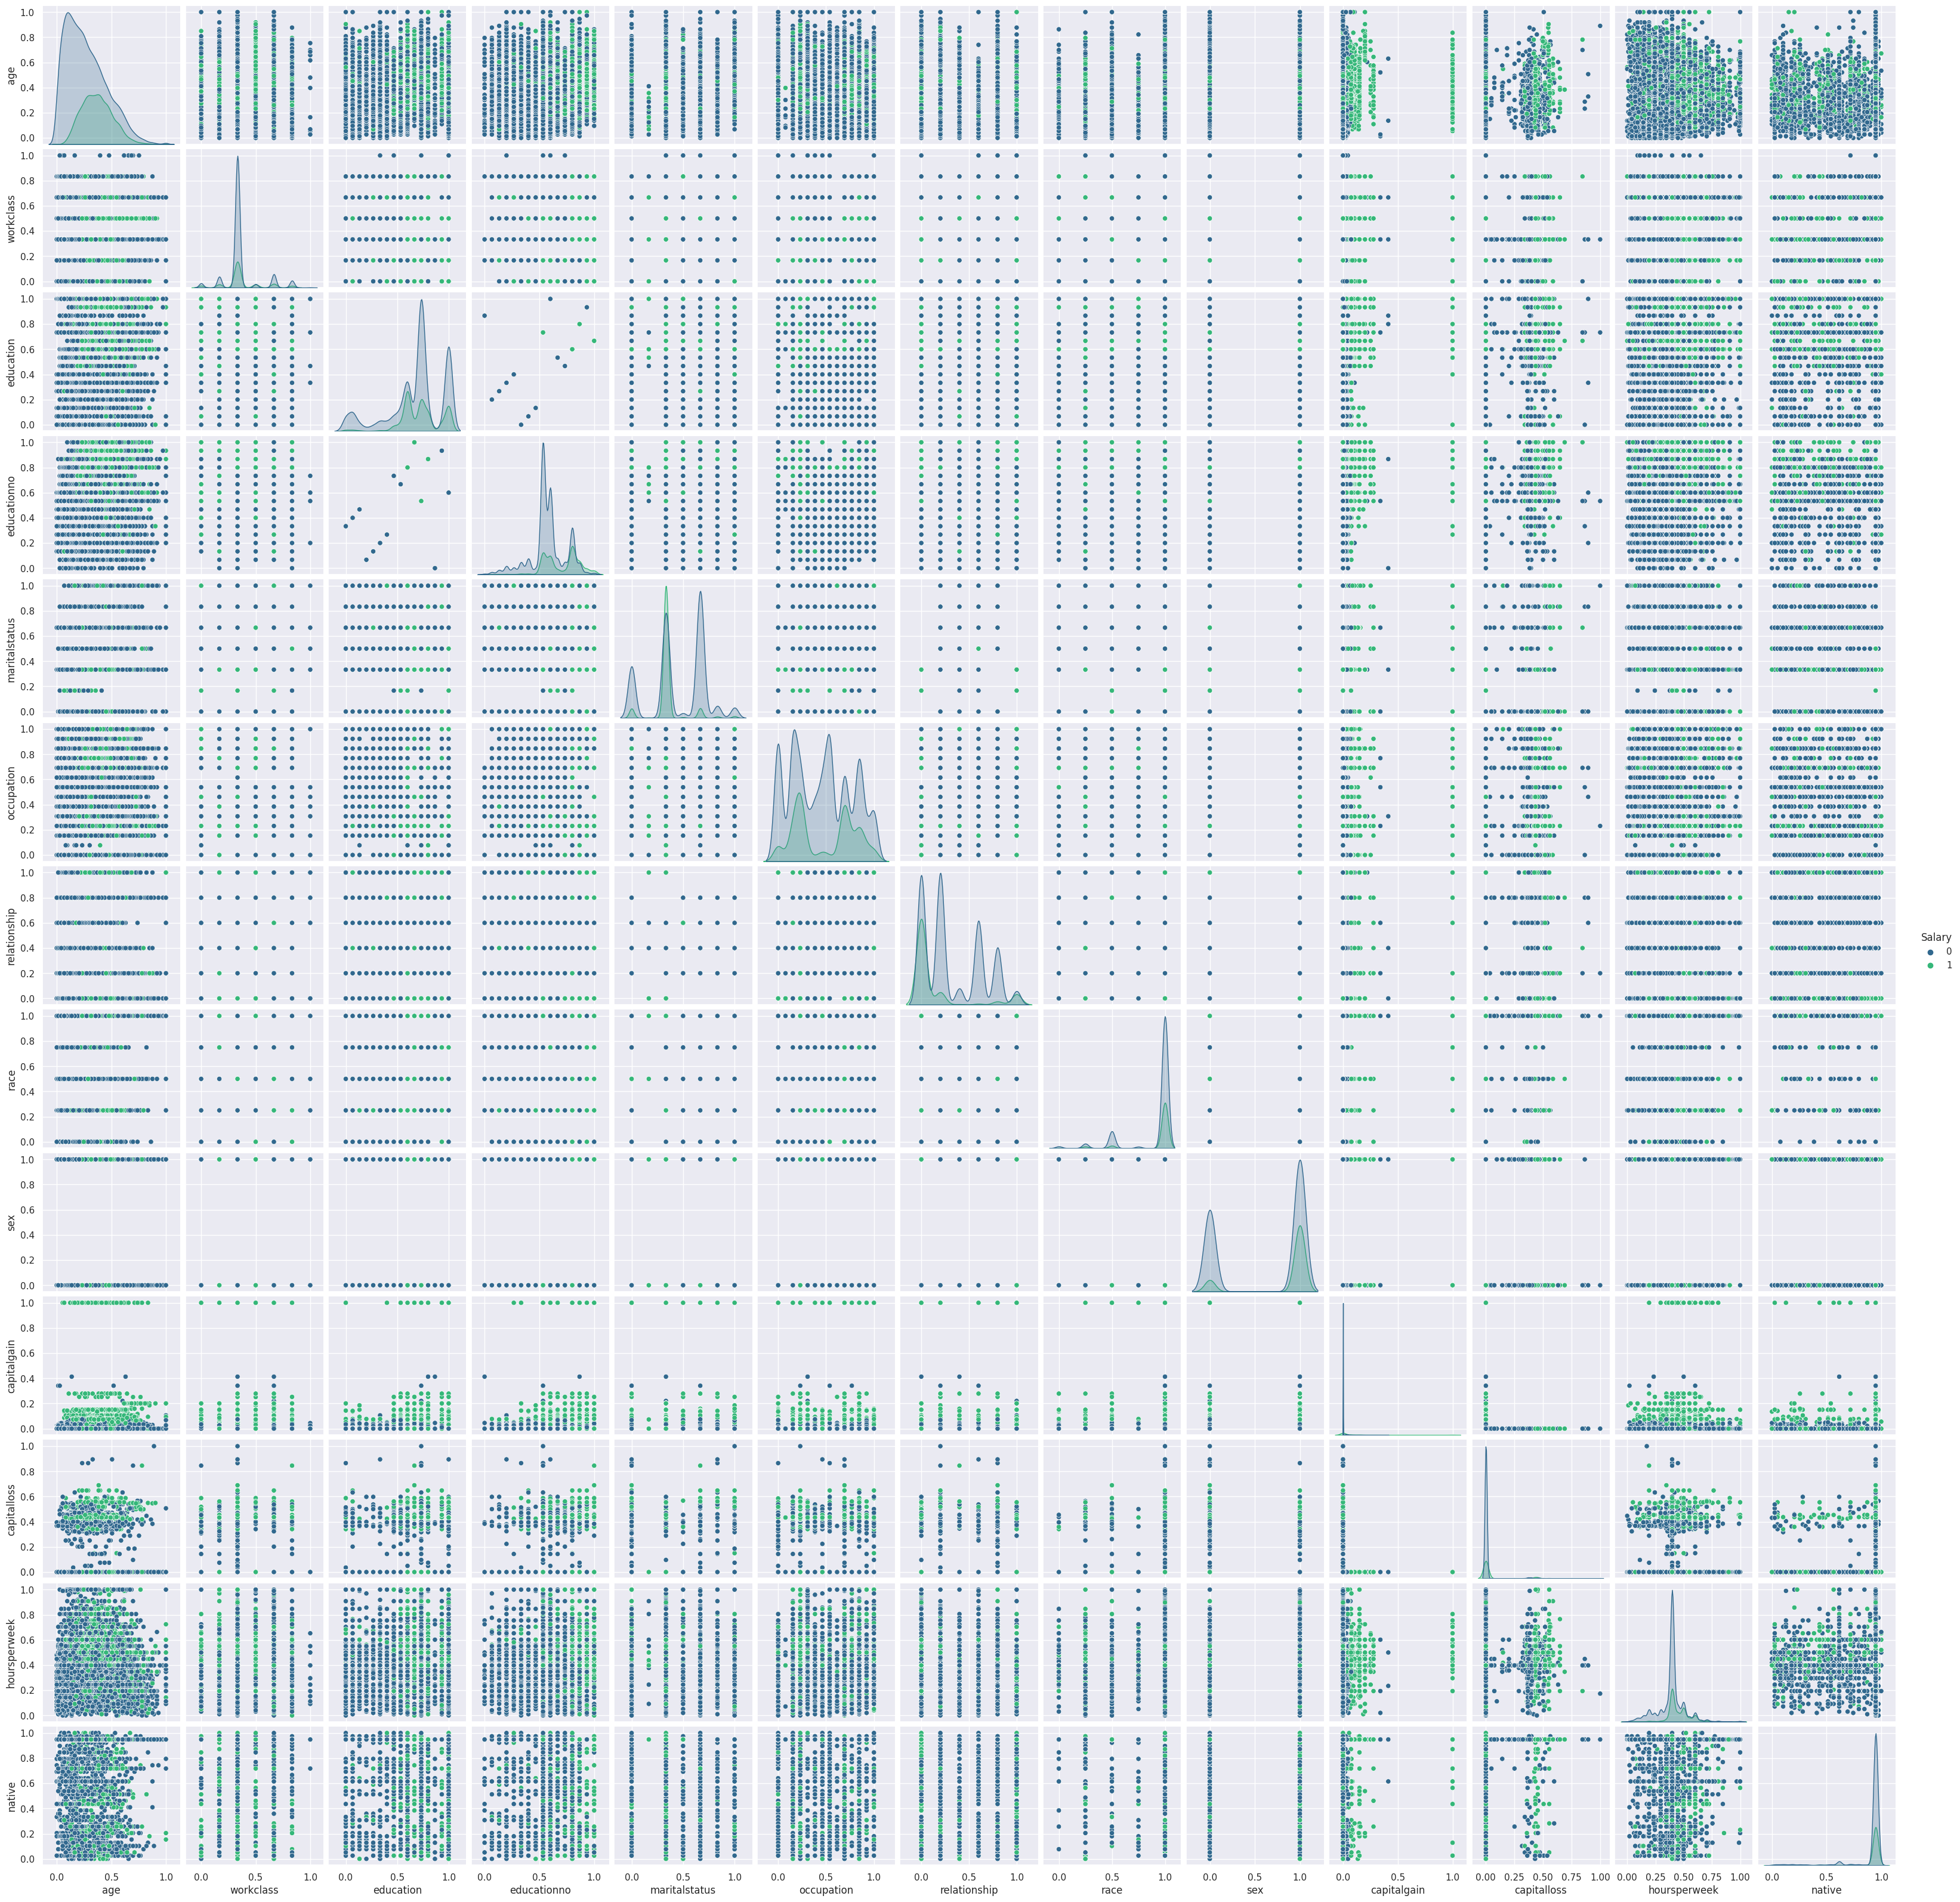

In [86]:
#pairwise plot
plt.figure(figsize=(10,8))
sns.pairplot(salary_train,hue='Salary',palette='viridis')

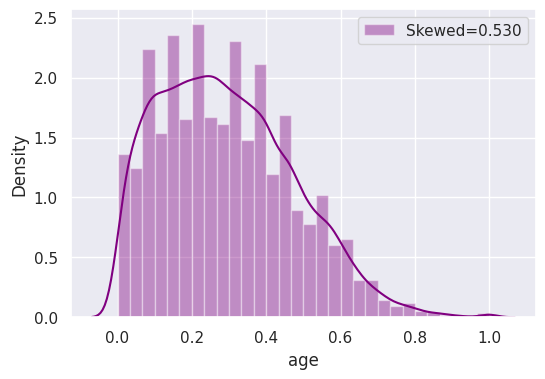

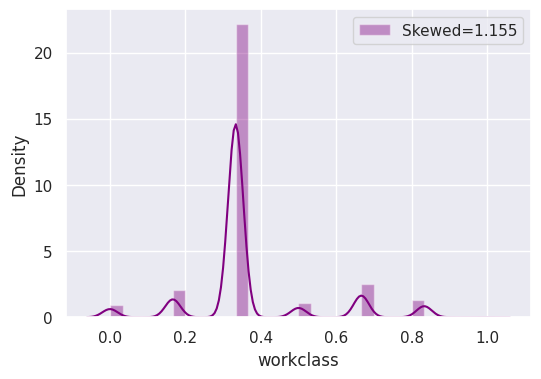

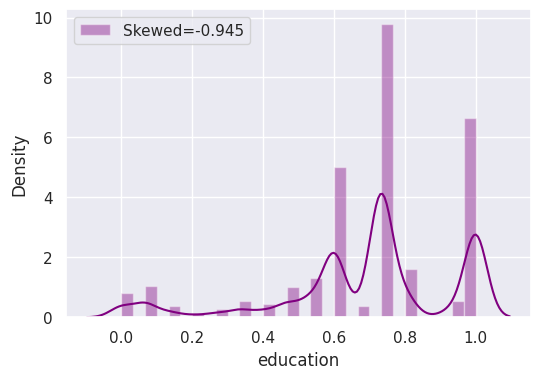

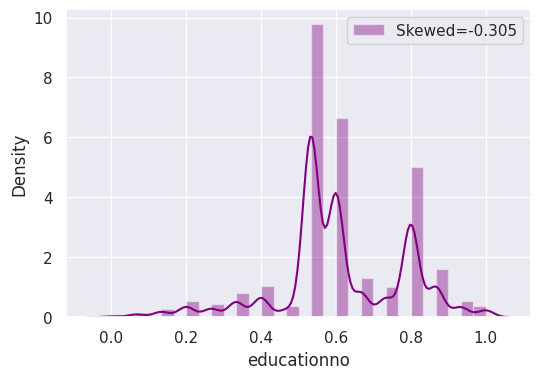

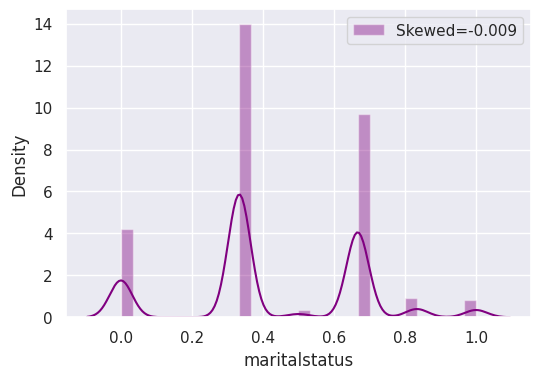

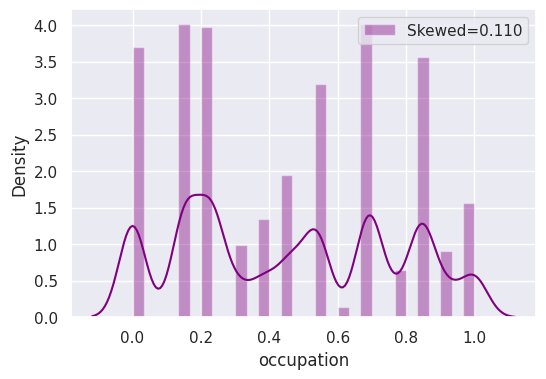

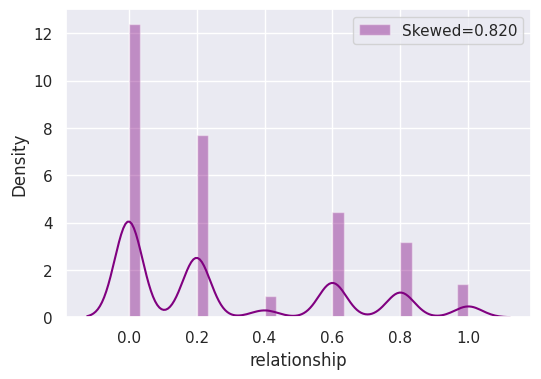

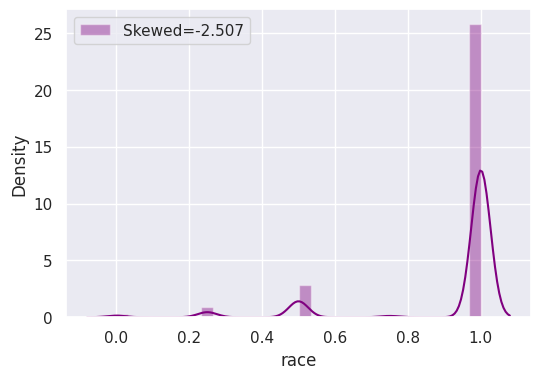

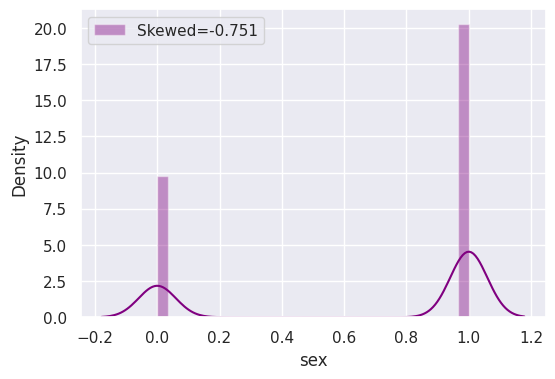

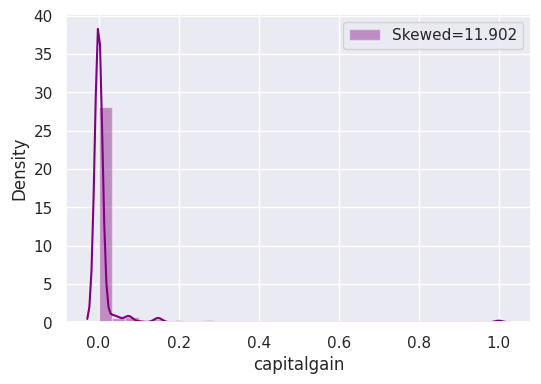

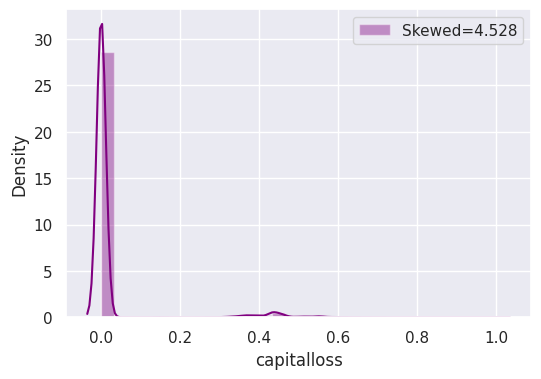

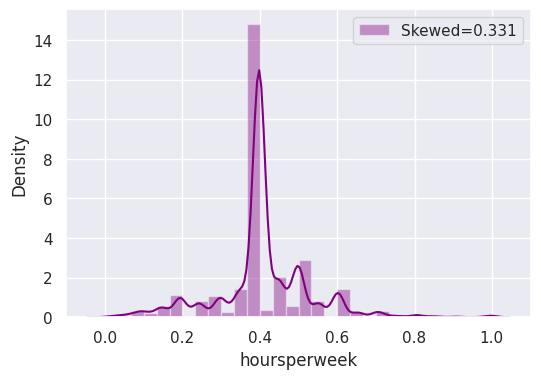

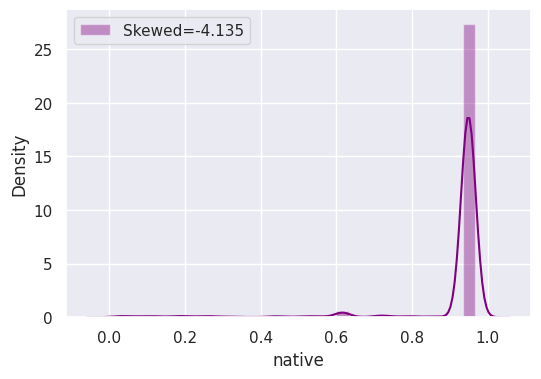

In [87]:
#univariate plot
#displot
feat=salary_train.iloc[:,:-1]
sns.set(rc={'figure.figsize':(6,4)})
for f in feat:
  skew=salary_train[f].skew()
  sns.distplot(salary_train[f],label='Skewed=%.3f'%(skew),bins=30,color='purple')
  plt.legend()
  plt.show()

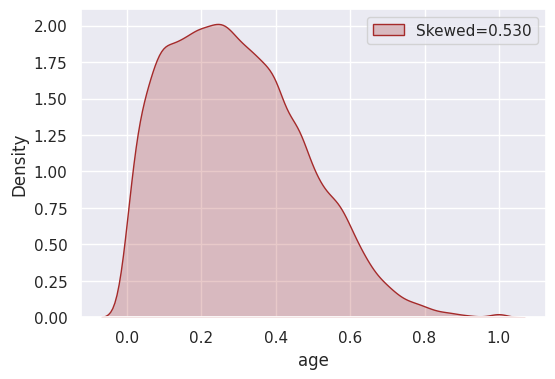

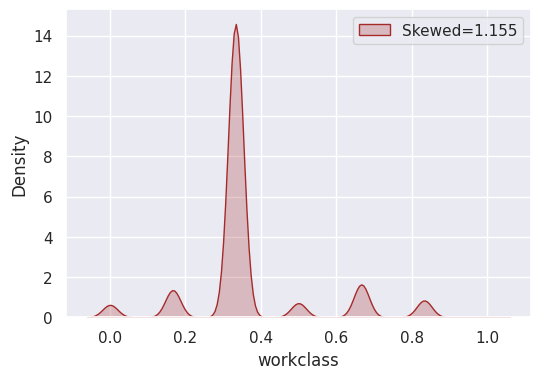

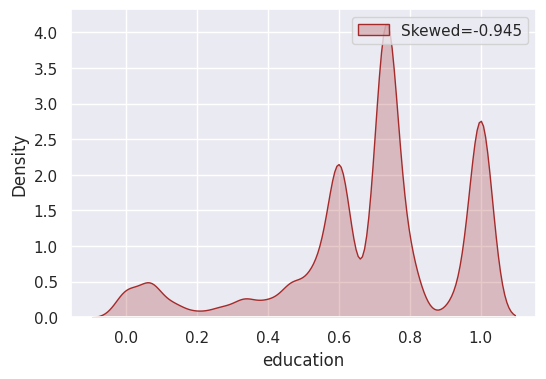

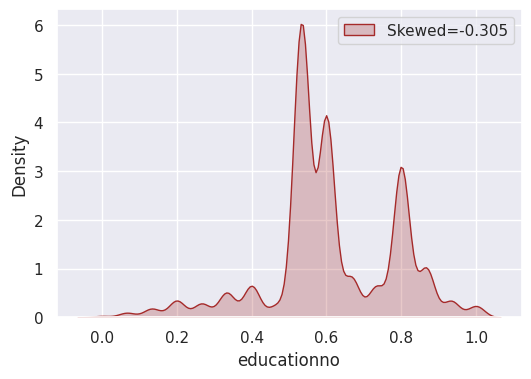

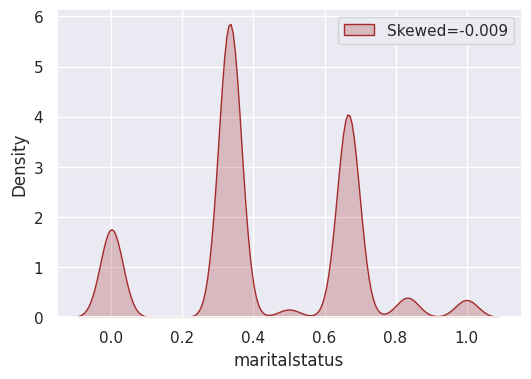

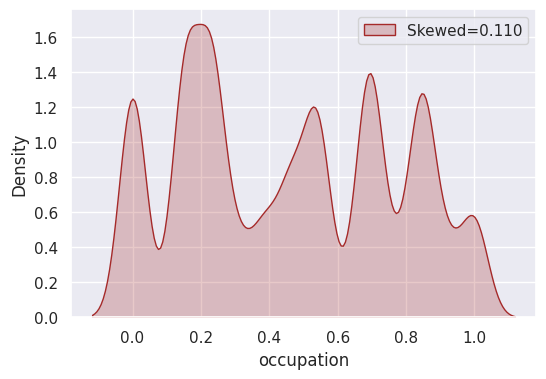

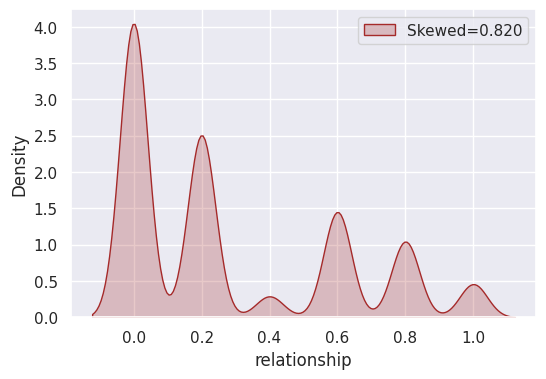

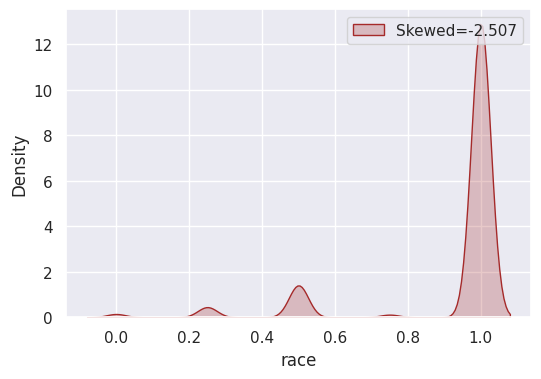

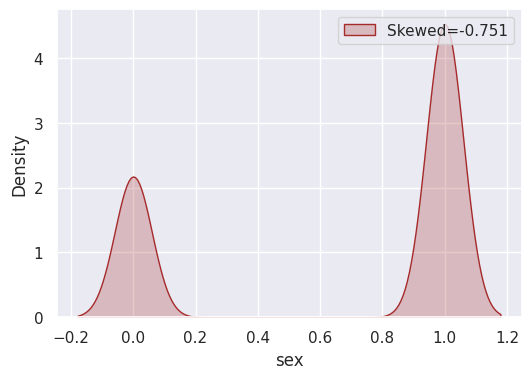

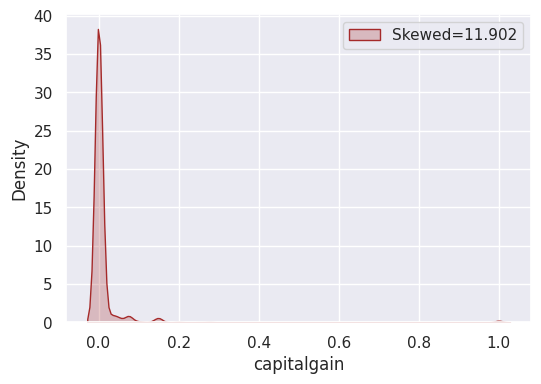

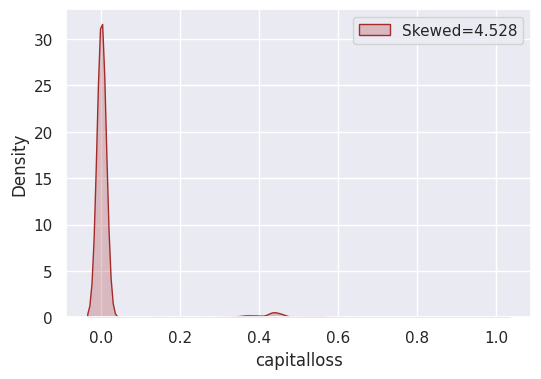

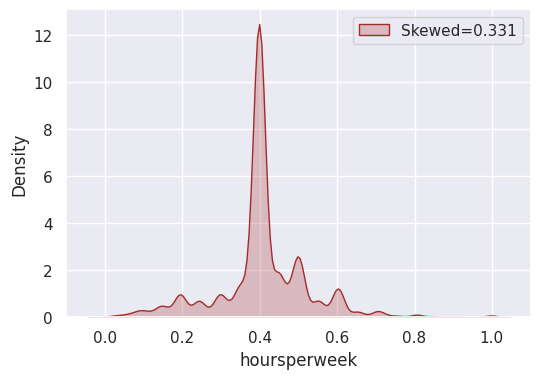

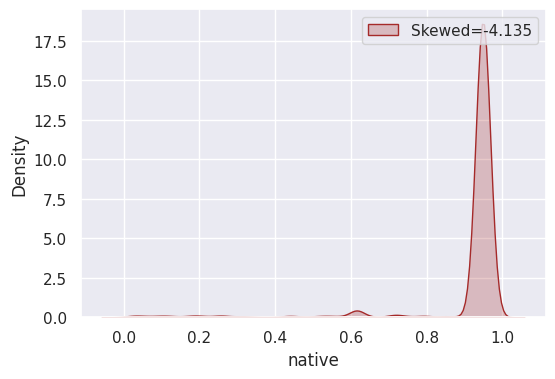

In [88]:
#kde plot
feat=salary_train.iloc[:,:-1]
sns.set(rc={'figure.figsize':(6,4)})
for f in feat:
  skew=salary_train[f].skew()
  sns.kdeplot(salary_train[f],label='Skewed=%.3f'%(skew),shade=True,color='brown')
  plt.legend()
  plt.show()

# **Spliting into training and testing**

**training data**

In [89]:
#training data
xtrain=salary_train.iloc[:,:-1]
ytrain=salary_train.iloc[:,-1]

**testing data**

In [90]:
#testing data
xtest=salary_test.iloc[:,:-1]
ytest=salary_test.iloc[:,-1]

In [91]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(30161, 13)
(30161,)
(15060, 13)
(15060,)


# **Naive Bayes Classifier**

# **Building Naive Bayes Models**

# **1.Gaussian Naive Bayes**

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [93]:
model1=GaussianNB()                 #initialization
model1.fit(xtrain,ytrain)           #fitting
ypred1=model1.predict(xtest)        #predicting

In [94]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.67      0.34      0.45      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



In [95]:
print(confusion_matrix(ytest,ypred1))

[[10746   614]
 [ 2446  1254]]


In [96]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred1),2)*100)

Accuracy= 80.0


In [97]:
#Accuracy when we use Gaussian Naive Bayes Model is 80%

# **2.Multinomial Naive Bayes**

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
model2=MultinomialNB()             #initialization
model2.fit(xtrain,ytrain)          #fitting
ypred2=model2.predict(xtest)       #prediction

In [100]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11360
           1       0.96      0.02      0.04      3700

    accuracy                           0.76     15060
   macro avg       0.86      0.51      0.45     15060
weighted avg       0.81      0.76      0.66     15060



In [101]:
print(confusion_matrix(ytest,ypred2))

[[11356     4]
 [ 3615    85]]


In [102]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred2),2)*100)

Accuracy= 76.0


In [103]:
#Accuracy when we use Multinomial Naive Bayes Model is 76%

# **3.Bernoulli Naive Bayes**

In [104]:
from sklearn.naive_bayes import BernoulliNB

In [105]:
model3=BernoulliNB()               #initialization
model3.fit(xtrain,ytrain)          #fitting
ypred3=model3.predict(xtest)       #prediction

In [106]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     11360
           1       0.47      0.73      0.57      3700

    accuracy                           0.73     15060
   macro avg       0.68      0.73      0.69     15060
weighted avg       0.79      0.73      0.74     15060



In [107]:
print(confusion_matrix(ytest,ypred3))

[[8288 3072]
 [1010 2690]]


In [108]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred3),2)*100)

Accuracy= 73.0


In [109]:
#Accuracy when we use Bernoulli Naive Bayes Model is 73%

# **4.Categorical Naive Bayes**

In [110]:
from sklearn.naive_bayes import CategoricalNB

In [111]:
model4=CategoricalNB()            #initialization
model4.fit(xtrain,ytrain)         #fitting
ypred4=model4.predict(xtest)      #prediction

In [112]:
print(classification_report(ytest,ypred4))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11360
           1       0.80      0.05      0.09      3700

    accuracy                           0.76     15060
   macro avg       0.78      0.52      0.48     15060
weighted avg       0.77      0.76      0.67     15060



In [113]:
print(confusion_matrix(ytest,ypred4))

[[11313    47]
 [ 3514   186]]


In [114]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred4),2)*100,)

Accuracy= 76.0


In [115]:
#Accuracy when we use Categorical Naive Bayes Model is 76%

# **5.Complement Naive Bayes**

In [116]:
from sklearn.naive_bayes import ComplementNB

In [117]:
model5=ComplementNB()               #intialization
model5.fit(xtrain,ytrain)           #fitting
ypred5=model5.predict(xtest)        #prediction

In [118]:
print(classification_report(ytest,ypred5))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75     11360
           1       0.43      0.83      0.56      3700

    accuracy                           0.68     15060
   macro avg       0.67      0.73      0.66     15060
weighted avg       0.80      0.68      0.71     15060



In [119]:
print(confusion_matrix(ytest,ypred5))

[[7208 4152]
 [ 614 3086]]


In [120]:
print('Accuracy=',np.round(accuracy_score(ytest,ypred5),2)*100)

Accuracy= 68.0


In [121]:
#Accuracy when we use Complement Naive Bayes Model is 68%

# **Conclusion**

In [ ]:
# So after performing all models "Gaussian Naive Bayes Model" is giving as Best Accuracy, when compare with other Naive Bayes Model.
# So "Gaussian Naive Bayes Model" in the Best Model with accuracy of 80% .
# Therefore Accuracy of "Gaussian Naive Bayes Model" is 80% .

In [122]:
##completed//////

# **Completed**